# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Los datos que me ayudarían a trabajar en este problema sería el comportamiento anual de los precios de las propiedades existentes y características adicionales con que cuentan estas propiedades, es decir: área, número de habitaciones, ubicación, etc. Estos parámetros permiten definir un precio proyectado y los datos actuales permitirán predecir futuros precios de inmuebles dadas características partículares del mismo.

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

* Librerias base y visualizacion

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter

%matplotlib inline 
sns.set(color_codes=True)

* Librerias de Machine Learning

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [4]:
properati_df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

Se analizará de primera forma las columnas del dataset y se analizará cuales son relevantes

In [5]:
properati_df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

Se cuenta el número de entidades por columna.

In [6]:
properati_df.count()

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

No hay un número de valores iguales para todas las columnas lo que supone la presencia de datos vacios.

### Visualización general del dataset

In [7]:
properati_df.shape

(146660, 19)

In [8]:
properati_df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [9]:
print('Valores faltantes por columna')
print (properati_df.isnull().sum())

Valores faltantes por columna
start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [9]:
count=properati_df["lat"].isnull().sum()
print("El número de items con valor nulo en lat es: ",count)

count1=properati_df["lon"].isnull().sum()
print("El número de items con valor nulo en lon es: ",count1)

count2=properati_df["bathrooms"].isnull().sum()
print("El número de items con valor nulo en bathrooms es: ",count2)

count3=properati_df["surface_total"].isnull().sum()
print("El número de items con valor nulo en surface_total es: ",count3)

count4=properati_df["surface_covered"].isnull().sum()
print("El número de items con valor nulos en surface_covered es: ",count4)

El número de items con valor nulo en lat es:  9925
El número de items con valor nulo en lon es:  9959
El número de items con valor nulo en bathrooms es:  5957
El número de items con valor nulo en surface_total es:  20527
El número de items con valor nulos en surface_covered es:  21614


La presencia de valores nulos comprueba la afirmación en la primera parte de exploración del dataset.

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

Se exploran los tipos de propiedades presentes en el dataset.

In [10]:
tipos = properati_df["property_type"].unique()
tipos = tipos.tolist()
print(tipos)

['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina', 'Otro', 'Local comercial', 'Cochera', 'Depósito']


#### Teniendose:

In [11]:
properati_df.property_type.value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

#### Conteo sin valores Na

In [12]:
properati_df.property_type.value_counts(dropna=False)

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

#### Representación gráfica de los tipos de propiedades del dataset

Con el ánimo de mejorar la visualización, y evitar realizar un número de gráficas mayor, se realiza un ajuste logaritmo al conteo.

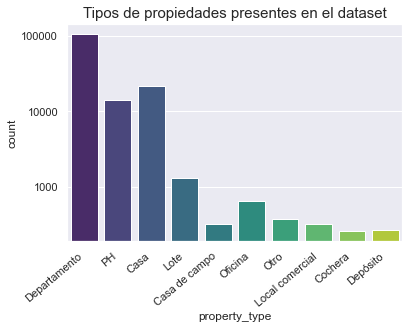

In [179]:
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
ax = sns.countplot(data = properati_df, x = "property_type",palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.title('Tipos de propiedades presentes en el dataset', size = 15)

plt.show()

Se evidencia que los tres tipos de propiedades principales son: Departamento, PH y Casa. Aunque el eje Y de la gráfica se encuentre en escala logaritmica, es posible inferir que el número de propiedades con la etiqueta Departamento es mayores que las demás presentadas.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

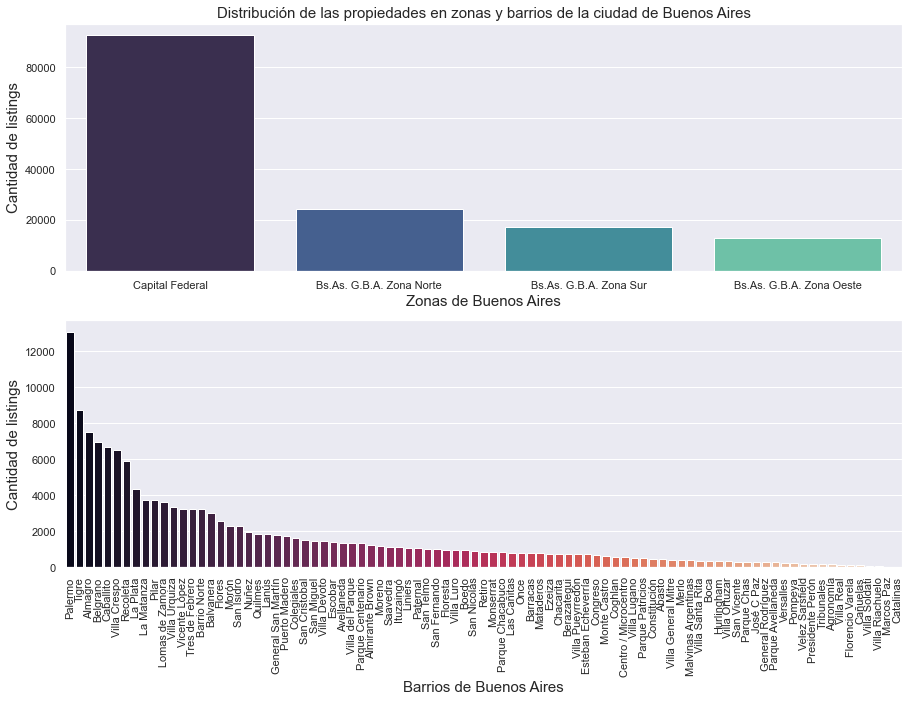

In [181]:
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
sns.countplot(data=properati_df, x = 'l2', order = properati_df.l2.value_counts().index,palette='mako')
plt.xlabel('Zonas de Buenos Aires', size = 15)
plt.ylabel('Cantidad de listings', size = 15)
plt.title('Distribución de las propiedades en zonas y barrios de la ciudad de Buenos Aires', size = 15)

plt.subplot(2,1,2)
sns.countplot(data=properati_df, x = 'l3',order = properati_df.l3.value_counts().index,palette='rocket')
plt.xticks(rotation= 90)
plt.xlabel('Barrios de Buenos Aires', size = 15)
plt.ylabel('Cantidad de listings', size = 15)

#plt.savefig('uno.png')

plt.show()

Se determina que Capital Federal guarda la mayor cantidad de datos del set y que, la mayoria de las propiedades se encuentran en el barrio Palermo.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

#### Paso 1: Filtrato por tipo de propiedad popular.

In [10]:
data = properati_df[((properati_df['property_type']  == "Departamento") |(properati_df['property_type'] == "Casa") | 
               (properati_df['property_type'] == "PH"))  & (properati_df['l2'] == "Capital Federal")].copy()
data.shape

(91485, 19)

#### Paso 2: Representación gráfica del dataset filtrado

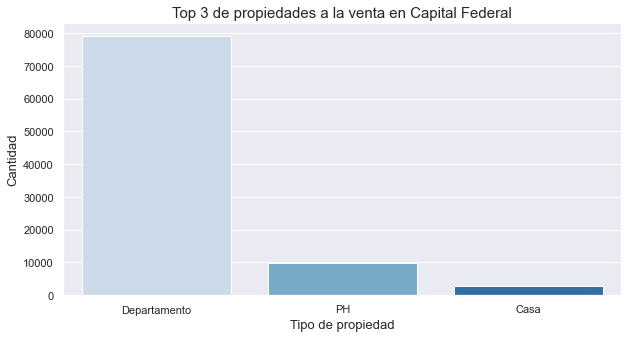

In [16]:
plt.figure(figsize = (10,5))
sns.countplot(x='property_type', data = data, palette='Blues')
plt.xlabel('Tipo de propiedad', size = 13)
plt.ylabel('Cantidad', size = 13)
plt.title('Top 3 de propiedades a la venta en Capital Federal', size = 15)
#plt.savefig('uno.png')
plt.show()

En relación a lo descrito anteriormente, se observa que Departamento es el tipo de propiedad mayormente presente en el Dataset. Esto supondría un problema a futura para entrenamiento del modelo ya que se contaria con un ajuste mayormente favorable para la determinación de precios para Departamentos en relación a los distintos tipos de propiedad.

Es posible pensar en un modelo ML para cada tipo de propiedad, aun así, con una cantidad de datos considerablemente mayor, es posible que no sea adeacuado.

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

1. **Metodología de trabajo:** Acontinuación se describe cómo se realizará el análisis y limpieza del dataset.
    * **Paso 1:** Exploración de valores y descripción del dataset.
    * **Paso 2:** Exploración de la columna `surface_total`
    * **Paso 3:** Exploración relación `surface_total` y `surface_covered`.
    * **Paso 4:** Análisis de ambientes de los inmuebles.
    * **Paso 5:** Limpieza columna `surface_total` a partir de análisis diagrama de caja.
    * **Paso 6:** Análisis de `surface_covered`.
    * **Paso 7:** Exploración de las columnas restantes.

   * **Paso 1:** Exploración de valores y descripción del dataset.

In [14]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


* Se observan valores extremos entre el cuantil ´.75´ y los valores máximos de parámetros asociados al inmueble. De igual forma se descartan las columnas de ´lat´ y ´lon´ ya que no serán de interés.

#### Se procederá a analizar columnas de interés

In [15]:
data.currency.value_counts()

USD    91485
Name: currency, dtype: int64

In [16]:
data.operation_type.value_counts()

Venta    91485
Name: operation_type, dtype: int64

In [17]:
data.l1.value_counts()

Argentina    91485
Name: l1, dtype: int64

#### Eliminar columnas de no interés

In [11]:
data.drop(['lon','lat', 'start_date','end_date','created_on','l1','currency', 'operation_type', 'l2'],1, inplace = True)

In [12]:
data.shape

(91485, 10)

* **Paso 2:** Exploración de la columna `surface_total`

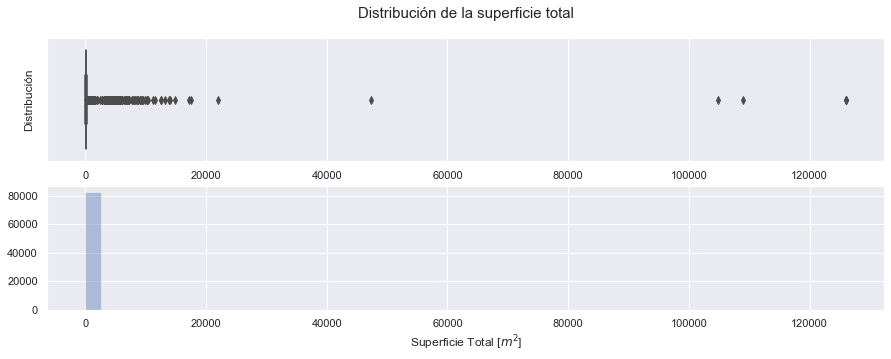

In [20]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize = (15,5))
plt.subplot(2,1,1)
sns.boxplot(
    x='surface_total', 
    data=data
).set(
    ylabel='Distribución'
)
plt.title('Distribución de la superficie total', weight=20, size = 15, pad = 20)

plt.subplot(2,1,2)
sns.distplot(x=data['surface_total'], kde = False)
plt.xlabel('Superficie Total [$m^{2}$]')

plt.show()

La presenta de outliers extremos dificulta observar la caja. Antes de realizar el recorte de los mismos del dataset. Se explorará otras inconsistencias del dataset.

Se establece una máscara a partir del cuantil 0.95 solo con el interés de revisar el comportamiendo del gráfico. No se alteran valores del dataset.

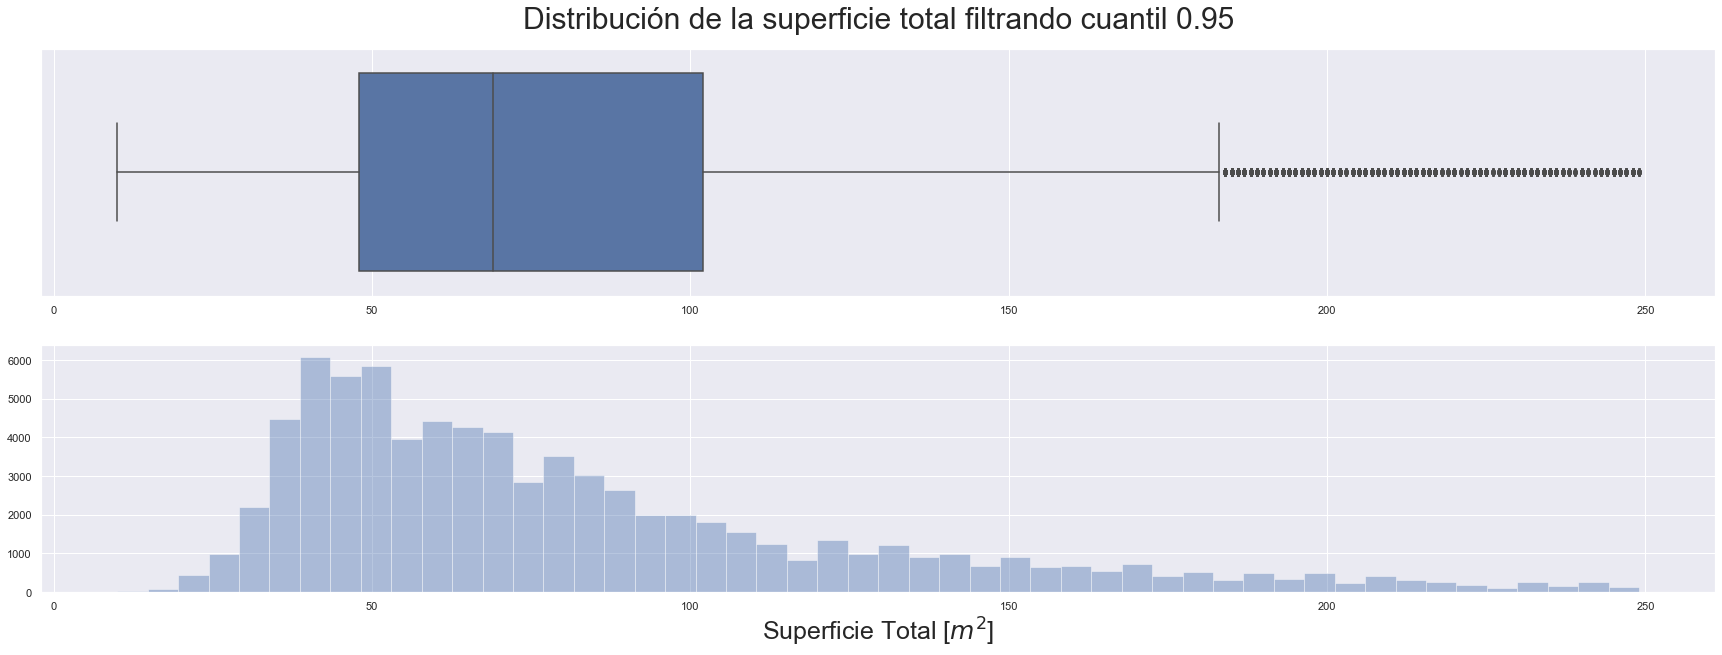

In [21]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

mask_st = data['surface_total'] < data['surface_total'].quantile(0.95)
x = data['surface_total'][mask_st]

plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(x)
plt.xlabel("")
plt.title('Distribución de la superficie total filtrando cuantil 0.95', weight=50, size = 30, pad = 20)

plt.subplot(2,1,2)
sns.distplot(x, kde = False)
plt.xlabel('Superficie Total [$m^{2}$]', size = 25)

plt.show()

Tomando una mascara en el cuantil 0.95 se observa un gráfico de caja más apropiado.

* **Paso 3:** Exploración relación `surface_total` y `surface_covered`.

Se exploran los primeros valores del dataset y los últimos (ordenados de mayor a menor.)

In [13]:
data.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH


In [14]:
data.nsmallest(5, ['surface_total'])

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
73182,Villa Lugano,2.0,1.0,1.0,10.0,45.0,220000.0,Venta PH en Villa Lugano Capital Federal Piedr...,"PH en Venta, Ph de 2 ambientes al frente con l...",PH
132438,Belgrano,3.0,2.0,1.0,10.0,78.0,160000.0,Venta Belgrano 3-4 ambientes planta baja 87 me...,Corredor Responsable: Rebeca Stern - C.U.C.I.C...,Departamento
48635,Palermo,3.0,1.0,1.0,11.0,60.0,158000.0,Luminoso PH 3 ambientes en Palermo Soho,Corredor Responsable: Flavia Aguirre - CUCICBA...,PH
57085,Parque Chacabuco,2.0,1.0,1.0,11.0,73.0,161900.0,Venta 2 amb estrenar cochera ameneties P.Chaca...,Corredor Responsable: Hernan Perrone - C.U.C.I...,Departamento
89351,Barrio Norte,4.0,3.0,2.0,11.0,125.0,476000.0,Venta depto 4 ambIentes SEMIPISO B.NORTE,Corredor Responsable: Jorge Salafia - CUCICBA ...,Departamento


* Se observan algunas inconsistencias donde el valor de ´surface_total´ es menor que el valor de ´surface_covered´.

In [15]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


#### Limpieza de la superficie total menor a superficie cubierta.

Se establece una máscara con la condición y se modifica el dataset.

In [16]:
mask_surface = data['surface_covered'] <= data['surface_total']
data = data[mask_surface]

In [17]:
data.shape

(81291, 10)

Se procede a verificar la información en el datase.

In [18]:
data.nsmallest(5, ['surface_total'])

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
92326,San Telmo,1.0,1.0,NaN,12.0,12.0,13000.0,Cochera a metros de AV 9 De Julio y Independencia,Corredor Responsable: JUAN FRANCISCO CARATTINO...,Departamento
20534,Belgrano,1.0,1.0,1.0,13.0,13.0,39000.0,1 ambiente OPORTUNIDAD,OPORTUNIDAD 1 AMBIENTE<br>3 Piso por escalera<...,Departamento
28391,Liniers,1.0,1.0,1.0,13.0,13.0,12000.0,OPORTUNIDAD DE INVERSION !,** SE VENDE **REAL OPORTUNIDAD !! IDEAL PARA I...,Departamento
28392,Liniers,1.0,1.0,1.0,13.0,13.0,12000.0,OPORTUNIDAD DE INVERSION !,** SE VENDE **REAL OPORTUNIDAD !! IDEAL PARA I...,Departamento
28393,Liniers,1.0,1.0,1.0,13.0,13.0,12000.0,OPORTUNIDAD DE INVERSION !,** SE VENDE **REAL OPORTUNIDAD !! IDEAL PARA I...,Departamento


Se observan valores na en la columna de baños. 

In [19]:
data.isna().sum()

l3                   0
rooms                0
bedrooms             0
bathrooms          833
surface_total        0
surface_covered      0
price                0
title                0
description          0
property_type        0
dtype: int64

* Con el fin de garantizar al menos monoambientes se eliminarán las instancias vacías.

In [20]:
data.dropna(inplace=True)

In [21]:
data.isna().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
title              0
description        0
property_type      0
dtype: int64

* **Paso 4:** Análisis de ambientes de los inmuebles.

Se garantizarán monoambientes mínimo de 20 metros cuadrados. Este criterio se selecciona a partir de monoambientes populares en paginas consultadas.

In [22]:
mask_ss = data.surface_total >= 20
data= data[mask_ss]
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,80388.000000,80388.000000,80388.000000,80388.000000,80388.000000,8.038800e+04
mean,3.009044,2.001095,1.555083,113.131164,92.380691,2.665555e+05
std,1.298681,1.044269,0.853297,993.423907,773.669717,3.349419e+05
min,1.000000,0.000000,1.000000,20.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,50.000000,45.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [23]:
data.shape

(80388, 10)

Se realiza la exploración de los ambientes presentes en el dataset.

In [24]:
print('Ambientes:\n', data.rooms.value_counts().sort_index())

Ambientes:
 1.0      6335
2.0     24273
3.0     25336
4.0     16647
5.0      4868
6.0      1665
7.0       643
8.0       391
9.0        74
10.0       75
11.0       25
12.0       35
13.0        2
14.0        4
15.0        7
16.0        3
18.0        2
21.0        1
26.0        2
Name: rooms, dtype: int64


* **Paso 5:** Limpieza columna `surface_total` a partir de análisis diagrama de caja.

Se utilizará una máscara a partir del cuantil 0.95 para observar su comportamiento. No se realizan cambios en el dataset.

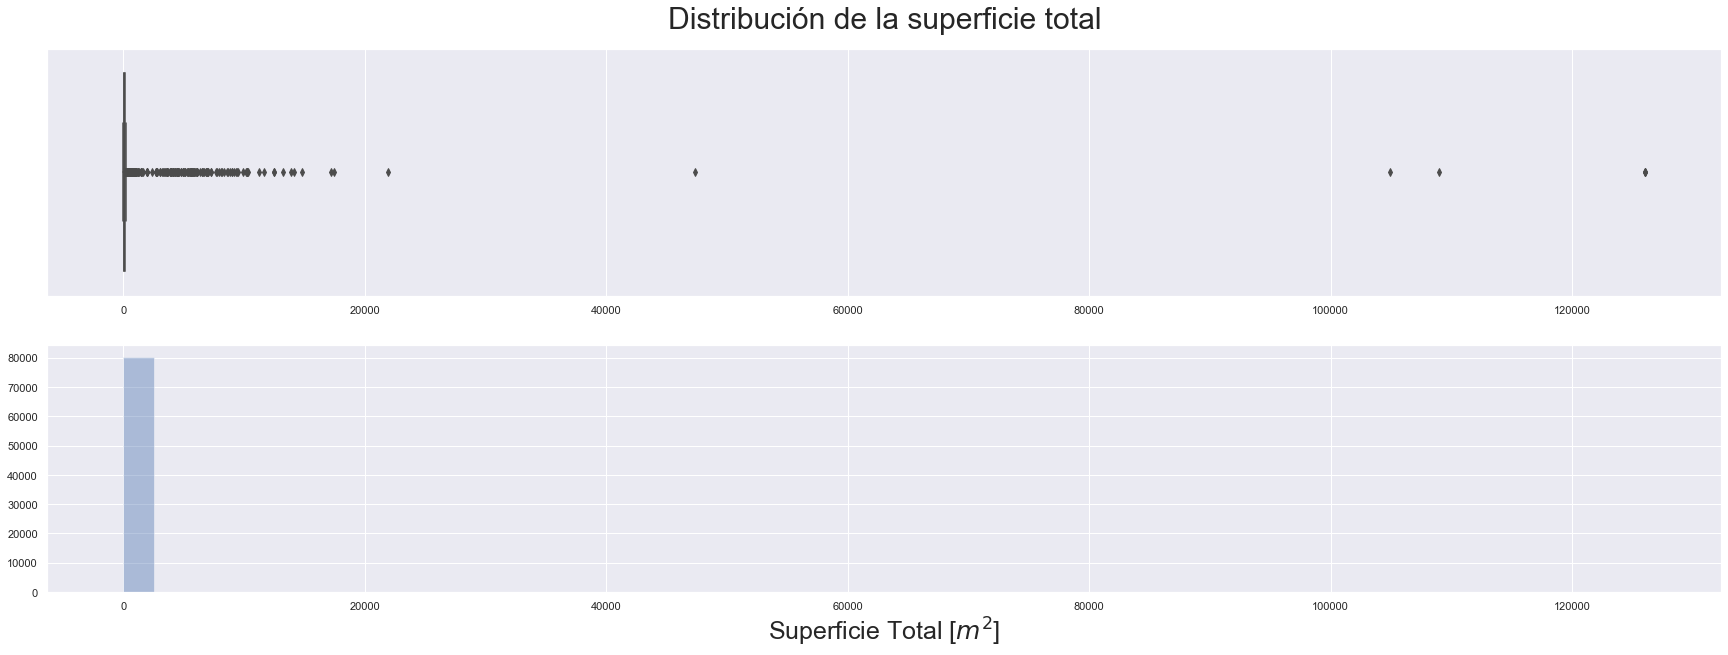

In [25]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(data['surface_total'])
plt.xlabel("")
plt.title('Distribución de la superficie total', weight=50, size = 30, pad = 20)

plt.subplot(2,1,2)
sns.distplot(data['surface_total'], kde = False)
plt.xlabel('Superficie Total [$m^{2}$]', size = 25)

plt.show()
plt.show()

Con una primera limpieza preliminar, se siguen observando outliers extremos. Se procederá a limpiarlos a partir del analisis de los cuantiles 0.25 y 0.75.

El recuadro se extiende desde los valores de cuartil Q1 a Q3 de los datos, con una línea en la mediana (Q2). Los bigotes se extienden desde los bordes de la caja para mostrar el rango de los datos. La posición de los bigotes se establece de forma predeterminada en 1.5 * IQR (IQR = Q3 - Q1) desde los bordes de la caja. Los puntos atípicos son aquellos que se encuentran más allá del final de los bigotes

* Análisis del comportamientos de los cuantiles en el dataset.

In [26]:
data.quantile([.1, .25, .5, .75], axis = 0)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0.10,2.0,1.0,1.0,39.0,36.0,94000.0
0.25,2.0,1.0,1.0,50.0,45.0,125000.0
0.50,3.0,2.0,1.0,71.0,63.0,180000.0
0.75,4.0,3.0,2.0,111.0,96.0,280000.0


* A partir de la relación de los cuartiles .25 y .75 se realiza la limpieza de valores fuera de los bigotes del diagrama de caja.

In [27]:
sP_Supp = data['surface_total']
IQR = 1.5*(sP_Supp.quantile(.75)-sP_Supp.quantile(.25))
lim_sup = sP_Supp.quantile(.75)+IQR
lim_inf = sP_Supp.quantile(.25)-IQR

Identificados los límites, se crea el conjunto de datos dentro de los límites.

In [28]:
sP_clean_Supp = sP_Supp[(sP_Supp >= lim_sup) | (sP_Supp <= lim_inf)]
sP_clean_Supp

250       240.0
269       206.0
274       304.0
280       276.0
282       327.0
          ...  
146180    236.0
146181    220.0
146532    326.0
146556    317.0
146558    220.0
Name: surface_total, Length: 6163, dtype: float64

Se realiza la limpieza del dataset.

In [29]:
data_properati=data.drop(sP_clean_Supp.index)

In [30]:
data_properati.shape

(74225, 10)

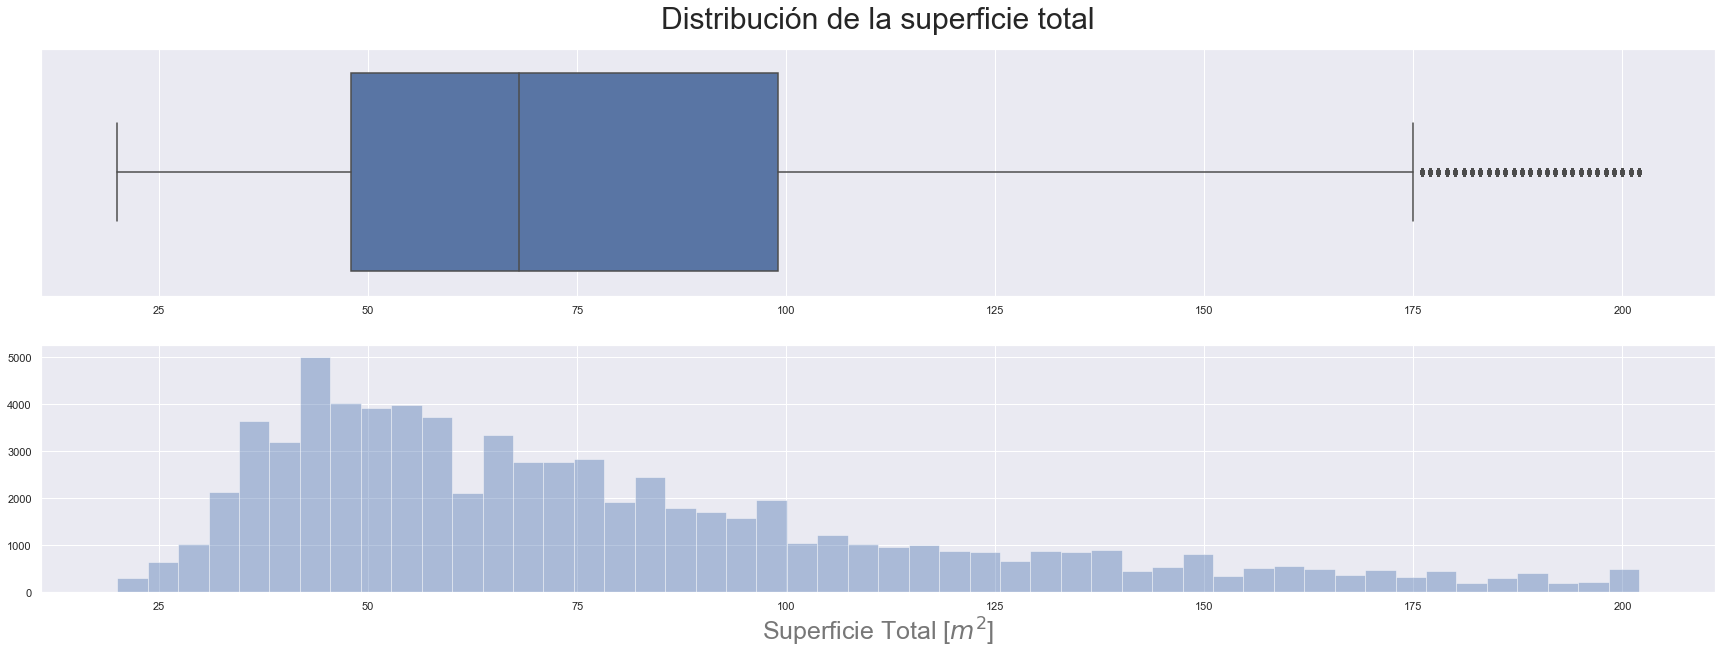

In [31]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(data_properati['surface_total'])
plt.xlabel("")
plt.title('Distribución de la superficie total', weight=50, size = 30, pad = 20)

plt.subplot(2,1,2)
sns.distplot(data_properati['surface_total'], kde = False)
plt.xlabel('Superficie Total [$m^{2}$]', size = 25, color='#777')

plt.show()
plt.show()

Aunque teoricamente el procedimiento realizado anteriormente debería eliminar por completo estos outliers, aun se observan algunos. A pesar de esto, se considera tomar el dataset de esta forma.

#### Se revisa el comportamiento de los datos.

In [32]:
data_properati.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,74225.000000,74225.000000,74225.000000,74225.000000,74225.000000,7.422500e+04
mean,2.826258,1.866474,1.442802,78.319326,69.345706,2.151498e+05
std,1.076255,0.906297,0.706587,39.765468,34.644822,1.948340e+05
min,1.000000,0.000000,1.000000,20.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,48.000000,43.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,68.000000,60.000000,1.700000e+05
75%,4.000000,2.000000,2.000000,99.000000,85.000000,2.550000e+05
max,21.000000,15.000000,14.000000,202.000000,202.000000,3.243423e+07


In [33]:
data_properati.quantile([.1, .25, .5, .75], axis = 0)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0.10,2.0,1.0,1.0,38.0,35.0,91100.0
0.25,2.0,1.0,1.0,48.0,43.0,120000.0
0.50,3.0,2.0,1.0,68.0,60.0,170000.0
0.75,4.0,2.0,2.0,99.0,85.0,255000.0


  * **Paso 6:** Análisis de `surface_covered`.

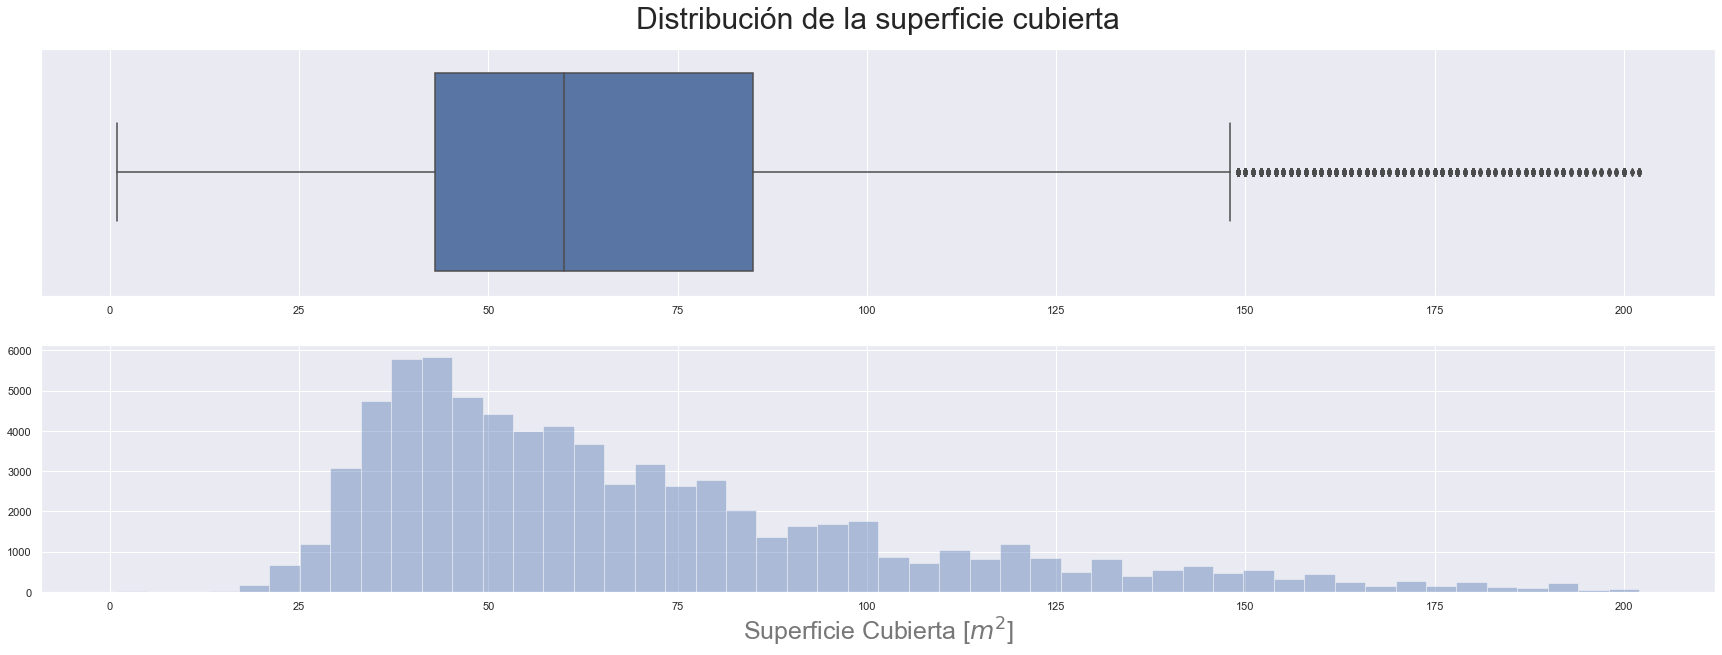

In [34]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(data_properati['surface_covered'])
plt.xlabel("")
plt.title('Distribución de la superficie cubierta', weight=50, size = 30, pad = 20)

plt.subplot(2,1,2)
sns.distplot(data_properati['surface_covered'], kde = False)
plt.xlabel('Superficie Cubierta [$m^{2}$]', size = 25, color='#777')

plt.show()
plt.show()

Al igual que la superficie total, se observan outliers, aun así, los mismos no son relevantes en proporcion a los datos totales del dataset.

#### Se procede, entonces, al análisis de la columna Price

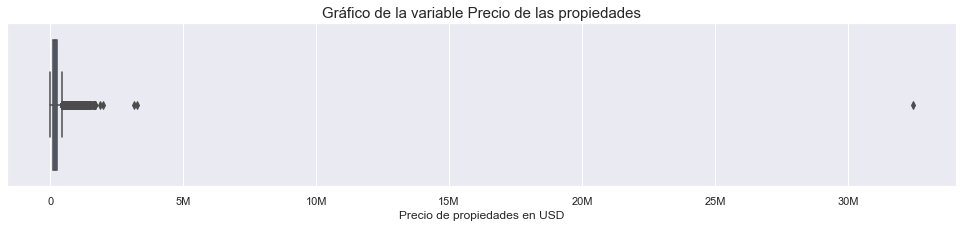

In [35]:
plt.figure(figsize = (17,3))
sns.boxplot( x='price', data = data_properati) 
plt.title('Gráfico de la variable Precio de las propiedades', size = 15)
plt.xlabel('Precio de propiedades en USD')
plt.xticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000], 
           labels = ['0', '5M','10M','15M','20M','25M', '30M'])
plt.show()

Al observar valores extremos por encima de los bigotes de la gráfica de caja, se procederá a limpiar estos valores extremos en relación a los cuantiles .75 y .25.

In [36]:
sP_Price = data_properati['price']
IQR = 1.5*(sP_Price.quantile(.75)-sP_Price.quantile(.25))
lim_sup = sP_Price.quantile(.75)+IQR
lim_inf = sP_Price.quantile(.25)-IQR

In [37]:
sP_clean_Price  = sP_Price [(sP_Price  >= lim_sup) | (sP_Price  <= lim_inf)]
sP_clean_Price 

160       498000.0
171       690000.0
172       560000.0
174       560000.0
175       560000.0
            ...   
146551    660000.0
146552    539000.0
146553    620000.0
146554    570000.0
146555    480000.0
Name: price, Length: 4489, dtype: float64

In [38]:
data_properati=data_properati.drop(sP_clean_Price.index)

In [39]:
data_properati.shape

(69736, 10)

Se procede a realizar la nueva gráfica de caja de los precios filtrados a través de los cuartiles

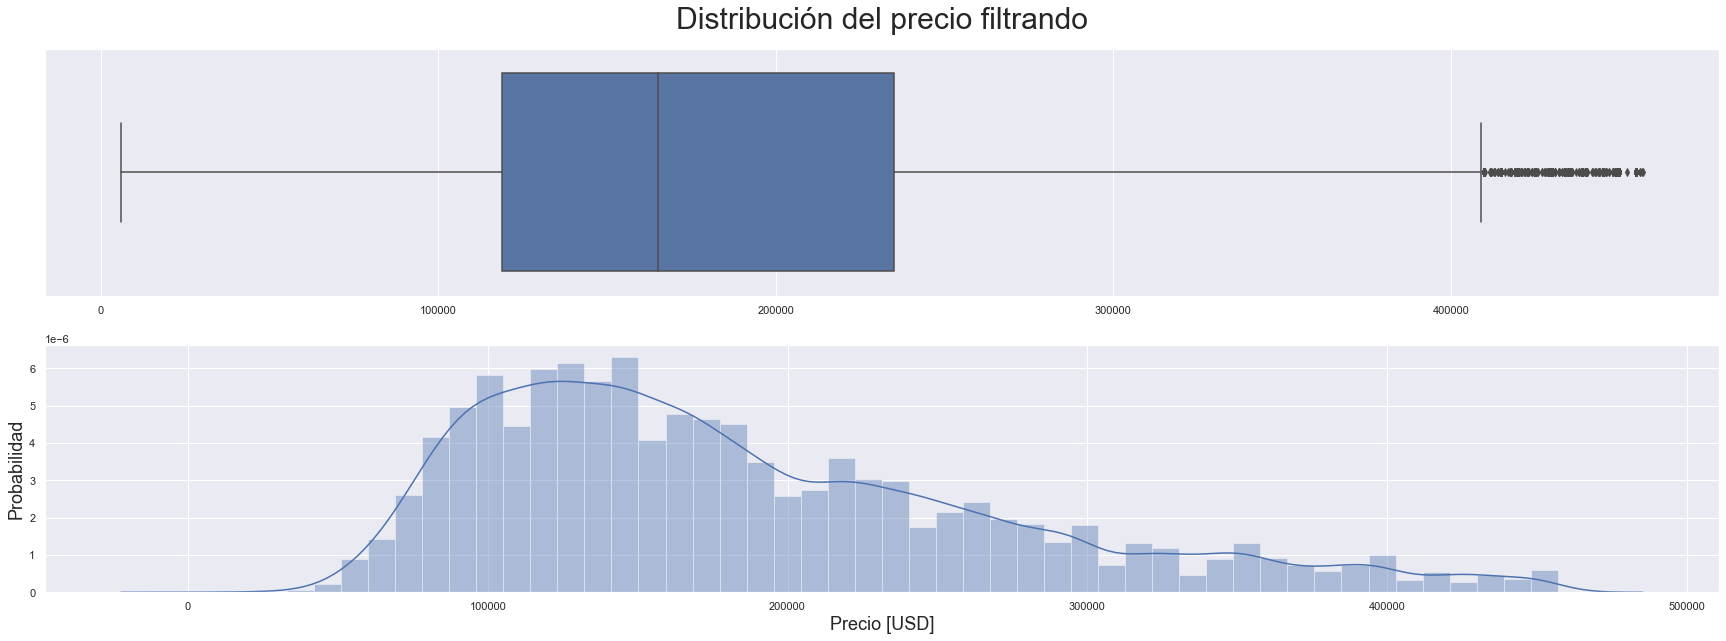

In [40]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(data_properati.price)
plt.xlabel("")
plt.title('Distribución del precio filtrando', weight=50, size = 30, pad = 20)
plt.subplot(2,1,2)
sns.distplot(data_properati.price, kde = True, hist = True)

plt.xlabel('Precio [USD]', size = 18)
plt.ylabel('Probabilidad', size = 18)
plt.show()

En cuanto al comportamiento de la variable Precio. Se maneja una situación similar a la presentada en los graficos de caja descritos anteriormente. Aun así, se observan que estos outliers son poco representativos.

Se observan saltos entre el cuantil .75 y los valores máximos de algunas columnas.

In [41]:
data_properati.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,69736.000000,69736.000000,69736.000000,69736.000000,69736.000000,69736.000000
mean,2.761328,1.815547,1.368146,73.862467,65.095962,185229.319534
std,1.052174,0.892761,0.627009,35.833620,30.186666,87897.628445
min,1.000000,0.000000,1.000000,20.000000,2.000000,6000.000000
25%,2.000000,1.000000,1.000000,47.000000,42.000000,119000.000000
50%,3.000000,2.000000,1.000000,65.000000,58.000000,165000.000000
75%,3.000000,2.000000,2.000000,91.000000,80.000000,235000.000000
max,21.000000,15.000000,14.000000,202.000000,202.000000,456900.000000


* **Paso 7:** Exploración de las columnas restantes.

In [42]:
data_properati.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH


Se analizaran las propiedades con un numero de cuartos superior a 8 ya que se encuentran propiedades de tipo HOSTAL dentro del deataset.

In [43]:
data_properati[data_properati.rooms > 8].head(20)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
3205,Mataderos,9.0,8.0,4.0,141.0,141.0,285000.0,PH 9 AMBIENTES HOSTEL PENSION FAMILIA NUMEROSA,Corredor Responsable: Gustavo Guastello - C.U....,PH
3711,Recoleta,10.0,7.0,5.0,168.0,168.0,370000.0,VENTA DEPARTAMENTO IDEAL OFICINAS CLÍNICA,Corredor Responsable: Ariel Champanier - CUCIC...,Departamento
4236,Villa Luro,10.0,10.0,2.0,160.0,160.0,320000.0,Casa para flia. numerosa / hostel / centro médico,Corredor Responsable: Fernando Muñoz - CUCICBA...,Casa
12222,Retiro,11.0,1.0,1.0,48.0,42.0,245000.0,Palacio Paz Exelente Monoambiete apto Profesional,Corredor Responsable: Mauro Marvisi - CUCICBA ...,Departamento
17455,Monserrat,10.0,10.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
17483,Monserrat,10.0,10.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
20991,San Nicolás,9.0,4.0,2.0,195.0,187.0,275000.0,DEPARTAMENTO 5 AMBIENTES RECOLETA SAN NICOLAS,Corredor Responsable: EMMA A. PIERSIMONI - CPI...,Departamento
39607,Barrio Norte,10.0,10.0,2.0,125.0,125.0,250000.0,SEMIPISO 10 Habitaciones al Frente a Hosp.Cl...,SEMIPISO excelente en esquina con balcón frent...,Departamento
39608,Barrio Norte,10.0,10.0,2.0,125.0,125.0,250000.0,SEMIPISO 10 HAB FRENTE A HOSP.CLINICAS IMPECABLE,SEMIPISO IDEAL RESIDENCIA ESTUDIO JURIDICO/ESC...,Departamento
42577,Recoleta,21.0,1.0,1.0,53.0,45.0,135000.0,Depto 2 ambientes Excelente Ubicación!,Corredor Responsable: Veronica Grela Reina - C...,Departamento


Algunas propiedades mayor a 8 ambientes se muestran como hoteles, clinicas, edificios

In [44]:
print('Las propiedades con más de 8 ambientes respresentan', 
      round((data_properati[data_properati.rooms > 8].shape[0]/data_properati.rooms.shape[0])*100,2),
      '% del dataset.')

Las propiedades con más de 8 ambientes respresentan 0.04 % del dataset.


Se limpian del dataset.

In [45]:
data_properati = data_properati[data_properati.rooms < 8]
data_properati.shape

(69602, 10)

In [46]:
data_properati.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,69602.000000,69602.000000,69602.000000,69602.000000,69602.000000,69602.000000
mean,2.750280,1.806356,1.367231,73.690023,64.918652,185084.667495
std,1.020773,0.865555,0.625846,35.631781,29.914124,87843.920829
min,1.000000,0.000000,1.000000,20.000000,2.000000,6000.000000
25%,2.000000,1.000000,1.000000,47.000000,42.000000,119000.000000
50%,3.000000,2.000000,1.000000,65.000000,57.000000,165000.000000
75%,3.000000,2.000000,2.000000,91.000000,80.000000,235000.000000
max,7.000000,15.000000,14.000000,202.000000,202.000000,456900.000000


Siguientes, los bathrooms.

Se observan un cambio drastico entre el cuantil 75 % y el valor maximo. Se analiza el comportamiento de la variable en el dataset a partir del conteo de los valores presentes en la columna.

In [47]:
data_properati.bathrooms.value_counts().sort_index()

1.0     48495
2.0     17352
3.0      3164
4.0       556
5.0        24
10.0        4
11.0        3
12.0        1
14.0        3
Name: bathrooms, dtype: int64

In [48]:
data_properati[data_properati.bathrooms > 5].head(20)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
19025,Monserrat,2.0,1.0,10.0,33.0,33.0,90000.0,VENTA DEPARTAMENTO DOS AMBIENTES MONTSERRAT,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento
19760,Monserrat,2.0,1.0,10.0,33.0,33.0,85000.0,VENTA DEPARTAMENTO DOS AMBIENTES MONTSERRAT,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento
35960,Palermo,2.0,1.0,14.0,50.0,50.0,225000.0,JUNCAL 4600.PALERMO NUEVO.VENTA 2 AMBIENTES CO...,EXCELENTE SEMIPISO 2 AMBIENTES EN PALERMO NUEV...,Departamento
53274,Belgrano,1.0,1.0,12.0,38.0,34.0,140000.0,"Belgrano - Edificio Live Zabala - 1 ambiente, ...",Entrega JUNIO 2019. NO APTO CRÉDITO A estrenar...,Departamento
58733,Monserrat,2.0,1.0,10.0,33.0,33.0,85000.0,RETASADO VENTA DEPARTAMENTO 2 AMBIENTES MONTSE...,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento
62342,Villa Crespo,3.0,2.0,11.0,47.0,45.0,105000.0,DEPARTAMENTO EN VENTA,Xintel (GOP-GOP-8133) Venta de Departamento 3 ...,Departamento
73948,Palermo,2.0,1.0,11.0,44.0,36.0,149000.0,Soldado de la Independencia al 700,VENTA- 2 AMBIENTES- BALCÓN ATERRAZADO- LAS CAÑ...,Departamento
128033,Almagro,3.0,2.0,11.0,100.0,80.0,199000.0,PH 3 ambientes c/Patio y Terraza 100 M2 - Almagro,Corredor Responsable: Uno Bienes Raices SRL - ...,PH
131845,Villa Lugano,4.0,3.0,10.0,80.0,80.0,68000.0,SE ALQUILA DPTO 4 AMB LUGANO I Y II,Se Vende Departamento 4 Ambientes en Villa Lug...,Departamento
132709,Recoleta,2.0,1.0,14.0,45.0,45.0,159000.0,SUIPACHA 1700.VENTA 2 AMBIENTES,EXCELENTE 2 AMBIENTES AL CONTRAFRENTE TOTALMEN...,Departamento


Propiedades presentadas como hotel familiar, se dropean. De igual forma, se observan que equivalen a valores mínimos poco representativos.

In [49]:
print('Las propiedades con más de 5 bañosequivalen:',
      round((data_properati[data_properati.bathrooms > 5].shape[0]/data_properati.bathrooms.shape[0])*100,2),
      '% del dataset.')

Las propiedades con más de 5 bañosequivalen: 0.02 % del dataset.


In [50]:
data_properati = data_properati[data_properati.bathrooms < 6]

In [51]:
data_properati.shape

(69591, 10)

#### Siguientes, habitaciones

Se realiza el conteo de valores presentes en la columna.

In [52]:
data_properati.bedrooms.value_counts().sort_index()

0.0       397
1.0     29995
2.0     24266
3.0     12896
4.0      1788
5.0       179
6.0        58
7.0         9
11.0        1
12.0        1
15.0        1
Name: bedrooms, dtype: int64

Se observaran propiedades con mas de 5 habitaciones. Se realiza un head para verificar la descripción de los items dentro del dataset.

In [53]:
data_properati[data_properati.bedrooms > 5].head(20)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
1096,Balvanera,6.0,6.0,1.0,73.0,73.0,135000.0,INVERSORES!!! DEPTO ANTIGUO A REFACCIONAR,Corredor Responsable: Maria Martínez Vila - CU...,PH
3706,Balvanera,7.0,7.0,1.0,90.0,90.0,150000.0,VENTA DEPARTAMENTO/OFICINA. BALVANERA.,Corredor Responsable: Cristian Arnal Ponti - C...,Departamento
4234,Caballito,7.0,7.0,4.0,150.0,150.0,330000.0,"CASA 7 AMB, PATIO,COCHERA, SUM Y TERRAZAS",Corredor Responsable: Ariel Champanier - C.U.C...,Casa
4620,Retiro,7.0,6.0,3.0,170.0,170.0,380000.0,Excelente 7 Ambientes en Edificio histórico Re...,"Departamento en muy buen estado, con 6 habitac...",Departamento
5132,Once,7.0,6.0,2.0,190.0,190.0,260000.0,Depto.tipo casa de 7 ambientes en Venta en Once,PH - MULTIPLES HABITACIONES - SIN EXPENSAS - T...,PH
8228,Monserrat,7.0,6.0,2.0,105.0,105.0,145000.0,VENTA PH 7 AMB. MONSERRAT U$S 145.000 + CUOTAS.,Corredor Responsable: Jorge Salafia - CUCICBA ...,PH
8843,Boca,2.0,15.0,1.0,47.0,44.0,100000.0,EXCELENTE 2 AMBIENTES CON BALCON AL FRENTE,2 AMB. AL FRENTE CON CÓMODO BALCÓN VISTA ...,Departamento
9688,Villa General Mitre,7.0,7.0,2.0,175.0,148.0,249500.0,Casa en venta lote propio Villa Mitre 7 ambientes,Corredor Responsable: Matias Castelli - CUCICB...,Casa
10276,Villa Crespo,7.0,6.0,2.0,130.0,130.0,320000.0,Depto.tipo casa de 7 ambientes en Venta en Vil...,"Se deja constancia que las caracteristicas, me...",PH


Se observan instancias con el mismo inconveniente de los casos anteriores. Se revisa el porcentaje de representación en el dataset.

In [54]:
print('Las propiedades con más de 5 habitaciones respresentan:', 
      round((data_properati[data_properati.bedrooms > 5].shape[0]/data_properati.bedrooms.shape[0])*100,2),
      '% del dataset.')

Las propiedades con más de 5 habitaciones respresentan: 0.1 % del dataset.


Se retiran estos valores del dataset.

In [55]:
data_properati = data_properati[data_properati.bedrooms < 6]

## Bueno y ahora, ¿Cómo quedaron los datos?

In [59]:
data_properati.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH
6,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH


In [60]:
data_properati.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,69521.000000,69521.000000,69521.000000,69521.000000,69521.000000,69521.000000
mean,2.746379,1.801787,1.364954,73.613081,64.835647,185034.802822
std,1.013049,0.852386,0.611789,35.536021,29.777517,87844.150765
min,1.000000,0.000000,1.000000,20.000000,2.000000,6000.000000
25%,2.000000,1.000000,1.000000,47.000000,42.000000,119000.000000
50%,3.000000,2.000000,1.000000,65.000000,57.000000,165000.000000
75%,3.000000,2.000000,2.000000,90.000000,80.000000,235000.000000
max,7.000000,5.000000,5.000000,202.000000,202.000000,456900.000000


* Para las habitaciones, baños y cuartos las diferencias entre el 75 % y el valor max no se distancian mucho.

#### Revisamos tamaño dataset

In [61]:
data_properati.shape

(69521, 10)

## Visualización general del dataset por tipo de la propiedad (3 mas populares)

<Figure size 2880x936 with 0 Axes>

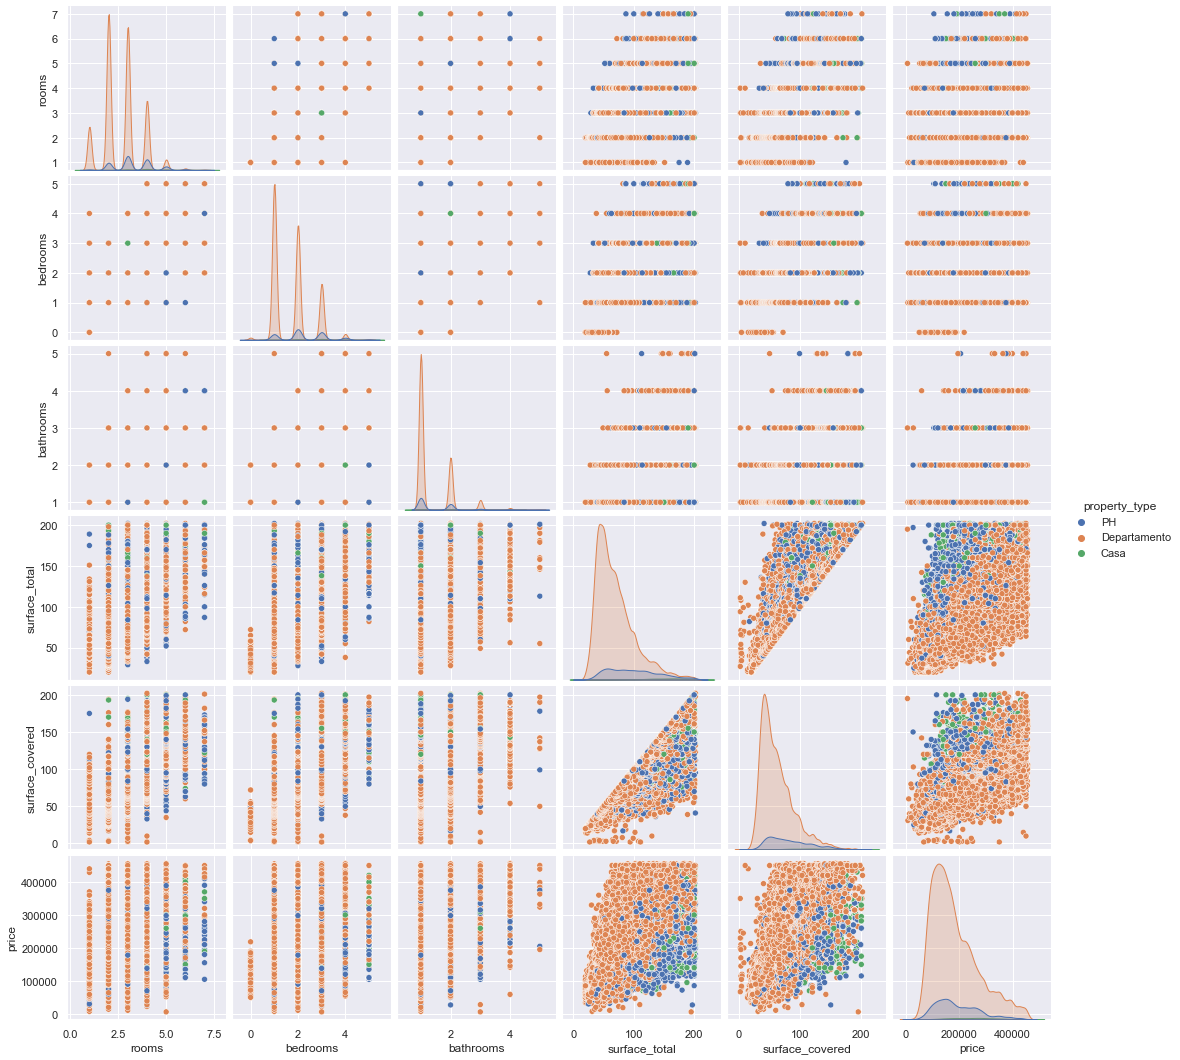

In [71]:
plt.figure(figsize = (40,13))
sns.pairplot(data = data_properati, hue = 'property_type')
plt.savefig('uno.png')
plt.show()

En el PairPlot podemos observar el comportamiento de las variables (en la diagonal principal) en forma de campana, similar a la campana de Gauss. En caso de tener valores extremos representativos no sería posible observar este comportamiento.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

### Se estudiará las correlaciones en primer lugar, de maneja general y luego especifica.

* Objetivo: Determinar variables que se utilizarían para el modelo de ML.

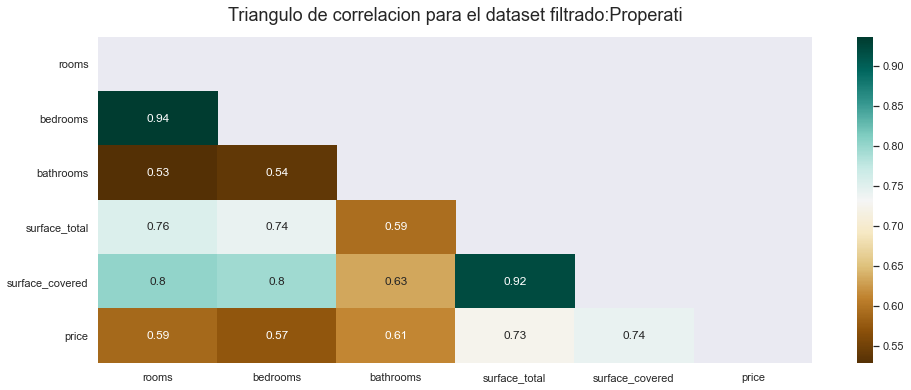

In [72]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(data_properati.corr(), dtype=np.bool))
heatmap = sns.heatmap(data_properati.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangulo de correlacion para el dataset filtrado:Properati', fontdict={'fontsize':18}, pad=16);

Se determina surface_total y surface_covered. Las otras, como los bedrooms y bathrooms podrían presentar escenarios de multicolinealidad; esto es, la necesidad de la existencia de un parámetro en relación a la otra. Otras variables de uso p]otencial, bathrooms y price

* Se analizara por tipo de propiedad para observar el comportamiento de las correlaciones.

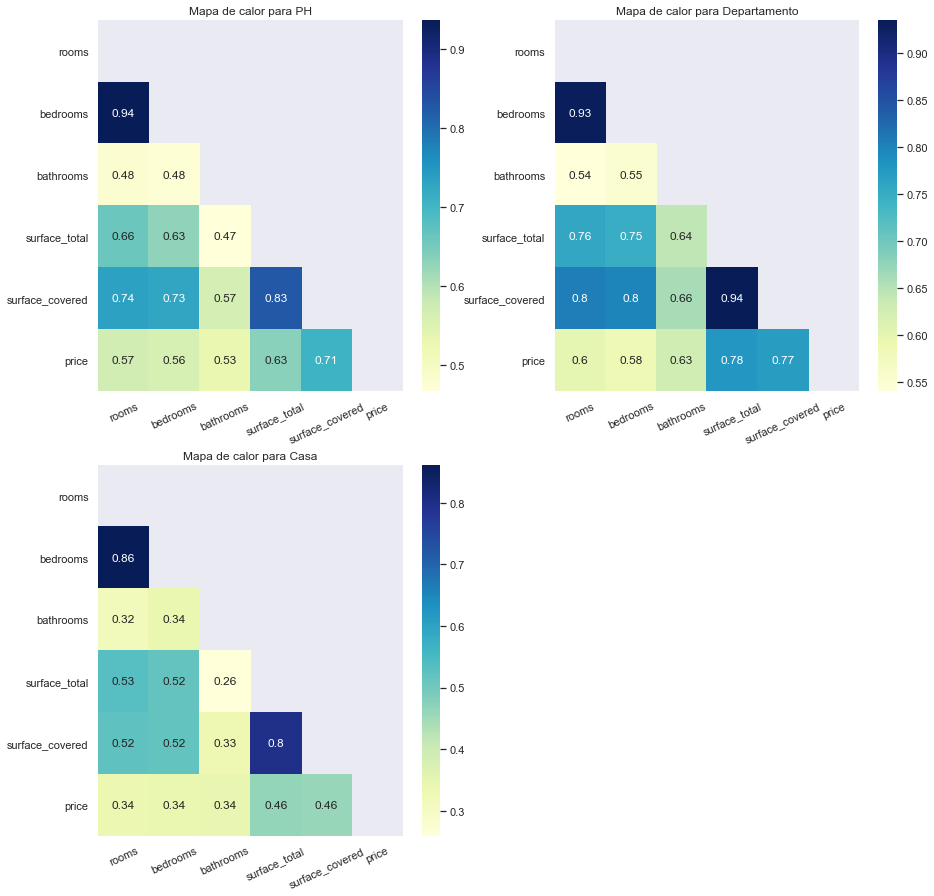

In [73]:
plt.figure(1,figsize=[15,15])
subcon=1
for i in data_properati.property_type.unique():
    plt.subplot(2,2,subcon)
    mask = np.triu(np.ones_like(data_properati.corr(), dtype=np.bool))
    plt.title(f'Mapa de calor para {i}')
    data_v=data_properati[data_properati.property_type==i]
    sns.heatmap(data_v.corr(), mask=mask, annot=True, cmap='YlGnBu')
    plt.xticks(rotation=25)
    subcon=subcon+1
plt.savefig('uno.png')

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


* Cual es el barrio mas caro?
* En que barrio estan las propiedades mas económicos?

In [183]:
desafio_df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
desafio_df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


* Filtrado de columnas no relevantes

In [184]:
desafio_df = desafio_df.filter(items=['l2', 'lat','lon','l3','rooms','bedrooms','bathrooms',
                                      'surface_total', 'price', 'property_type'])
desafio_df.head()

,l2,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,price,property_type
0,Capital Federal,-34.605880,-58.384949,San Cristobal,7.0,7.0,2.0,140.0,153000.0,Departamento
1,Capital Federal,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,159000.0,PH
2,Capital Federal,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,125000.0,PH
3,Capital Federal,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,295000.0,PH
4,Bs.As. G.B.A. Zona Sur,-34.914194,-57.938219,La Plata,2.0,1.0,1.0,50.0,40000.0,PH


In [185]:
desafio_df.shape

(146660, 10)

* Realizo comparacion del precio en una nueva columna a partir de la relación de costo por superficie de la propiedad.

In [188]:
desafio_df['price/surface'] = desafio_df['price']/desafio_df['surface_total']
desafio_df.head(5)

,l2,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,price,property_type,price/surface
0,Capital Federal,-34.605880,-58.384949,San Cristobal,7.0,7.0,2.0,140.0,153000.0,Departamento,1092.857143
1,Capital Federal,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,159000.0,PH,2271.428571
2,Capital Federal,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,125000.0,PH,2777.777778
3,Capital Federal,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,295000.0,PH,3470.588235
4,Bs.As. G.B.A. Zona Sur,-34.914194,-57.938219,La Plata,2.0,1.0,1.0,50.0,40000.0,PH,800.000000


#### ¿Cuál es el barrio con el mayor costo por metro cuadrado?

In [189]:
base = pd.pivot_table(desafio_df, values='price/surface', index=['l3'], aggfunc = np.mean)
barrio_costo = base.sort_values('price/surface', ascending=False).iloc[:5]
barrio_costo

,price/surface
l3,
Puerto Madero,6082.344948
Las Cañitas,3845.658070
Palermo,3528.897340
Belgrano,3365.345908
Recoleta,3345.969467


#### ¿Cuál es el barrio con el menor costo por metro cuadrado?

In [73]:
barrio_barato = base.sort_values('price/surface', ascending=True).iloc[:5]
barrio_barato

,price/surface
l3,
Presidente Perón,322.007544
Cañuelas,392.456650
General Rodríguez,417.104482
San Vicente,437.211436
Marcos Paz,448.756630


**¿Existe alguna relación entre la ubicación y el costo por metro cuadrado?**

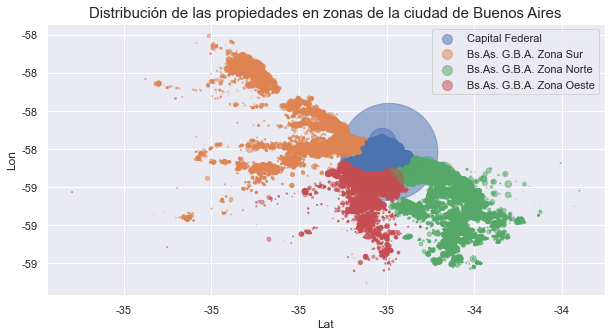

In [194]:
from matplotlib.ticker import FuncFormatter ###---

fig, ax = plt.subplots(figsize=(10,5)) ##---

for zone in desafio_df['l2'].unique():
    data = desafio_df[desafio_df['l2'] == zone]
    plt.scatter(data['lat'],data['lon'],
                s=data['price/surface']/80,
                alpha = 0.5,
                label=zone)

lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([100])
    
def millions(x, pos):
    return '{:1.0f}'.format(x)

formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.title('Distribución de las propiedades en zonas de la ciudad de Buenos Aires', size = 15)
plt.show()

El tamaño del circulo se estipula a partir de la relación precio/superficie total. Se encuentra que es la capital federal la que posee un costo por metro cuadrado mayor en comparación a las demás zonas.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

## Metodología de trabajo

Se propondrán diversos escenarios para la generación de modelos de Machine Learning más allá de lo mínimo requerido. Por ende, se establece la siguiente metodlogía de trabajo:

* **Paso 1:** Organización de datasets a utilizar. Se proponen tres casos: 1. Minimo entregable para el punto de Machine Learning, 2. Modelos para el dataset utilizado en los puntos anteriores y 3. Propuestas de modelo de ML a partir de organziación del Dataset por tipo de propiedad y 4. Análisis de features a partir de VIF y RFE/VRF.
* **Paso 2:** Se crearan funciones que permitan reducir el codigo relacionado a tareas repetitivas.
* **Paso 3:** Elección de métricas de evaluación del modelo.
* **Paso 4:** Creación de modelo de Benchmark, se selecciona el modelo básico de regresión lineal.
* **Paso 5:** Creación de cada modelo, primero, utilizando valores automáticos para hiperparámetros. Posterior, busqueda de mejor hiperparámetro a partir de exploración y calculo de error RMSE y R Cuadrado.
* **Paso 6:** Generación del modelo a partir del ajuste del hiperparámetro adecuado.
* **Resumen:** Comparación entre modelos.

**Paso 1:** Organización de datasets a usar.

### 1. Dataset del mínimo entregable.

In [56]:
data_base = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv') 
data_ML = data_base[(data_base['l2'] == "Capital Federal") & (data_base.property_type.isin(['Departamento','Casa','PH']))]
data_ML = data_ML[(data_ML['surface_total'] >= 15) & (data_ML['surface_total'] <= 1000)]
data_ML = data_ML[(data_ML['price'] <= 4000000)]
data_ML = data_ML.filter(items=['rooms', 'bedrooms','bathrooms','surface_total', 'surface_covered', 'price'])
data_ML = data_ML.dropna()
print('Checkpoint: ', data_ML.shape)

data_ML.head()

Checkpoint:  (81019, 6)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


* Creación de X y y y sets de entrenamiento y test.

In [57]:
X = data_ML.drop(['price'], axis=1)
y = data_ML['price']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


### 2. Dataset utilizado en el punto 2.

In [59]:
data_properati.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH
6,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH


In [60]:
X_p2 = data_properati.drop(['price','l3','title','description','property_type'], axis=1)
y_p2 = data_properati['price']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_p2, y_p2, test_size=0.30)

print(X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape)

(48664, 5) (48664,) (20857, 5) (20857,)


### 3. Dataset por propiedad (base: Dataset filtrado en el punto 2)

In [61]:
dptos = data_properati[data_properati.property_type == 'Departamento']
casas = data_properati[data_properati.property_type == 'Casa']
ph = data_properati[data_properati.property_type == 'PH']

* Para el caso de departamentos

In [62]:
X_p3_depto = dptos.drop(['price','l3','title','description','property_type'], axis=1)
y_p3_depto = dptos['price']

X_train3a, X_test3a, y_train3a, y_test3a = train_test_split(X_p3_depto, y_p3_depto, test_size=0.30)

print(X_train3a.shape, y_train3a.shape, X_test3a.shape, y_test3a.shape)

(42496, 5) (42496,) (18213, 5) (18213,)


* Para el caso de casas

In [63]:
X_p3_casas = casas.drop(['price','l3','title','description','property_type'], axis=1)
y_p3_casas = casas['price']

X_train3b, X_test3b, y_train3b, y_test3b = train_test_split(X_p3_casas, y_p3_casas, test_size=0.30)

print(X_train3b.shape, y_train3b.shape, X_test3b.shape, y_test3b.shape)

(514, 5) (514,) (221, 5) (221,)


* Para el caso de PH

In [64]:
X_p3_ph = ph.drop(['price','l3','title','description','property_type'], axis=1)
y_p3_ph = ph['price']

X_train3c, X_test3c, y_train3c, y_test3c = train_test_split(X_p3_ph, y_p3_ph, test_size=0.30)

print(X_train3c.shape, y_train3c.shape, X_test3c.shape, y_test3c.shape)

(5653, 5) (5653,) (2424, 5) (2424,)


* **Paso 2:** Definiciones de funciones.

#### Para el Arbol Regresor

In [65]:
def flop_arbol_rmse(X_train,y_train, X_test, y_test, max_depth):
    '''
    Dado los conjuntos Train y Test y profundidad (lista), genera un ciclo
        para encontrar el hiperparámetro adecuado..
    
    Arguments:
    X_train -- conjunto features train
    y_train -- conjutno y train
    X_test -- conjunto features test
    y_test -- conjutno y test
    max_depth -- Lista profundidades a explorar
    
    Returns:
    list_rmse_train_tree -- lista RMSE conjunto train
    list_rmse_test_tree -- lista RMSE conjunto test
    '''
    
    list_rmse_train_tree = []
    list_rmse_test_tree = []
    rmse_train = 0
    rmse_test = 0
    max_depths = max_depth

    for i in max_depths:
        tree_reg = DecisionTreeRegressor(max_depth = i)
        tree_reg.fit(X_train,y_train)

        y_train_pred_tree = tree_reg.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))

        y_test_pred_tree = tree_reg.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))

        list_rmse_train_tree.append(rmse_train)
        list_rmse_test_tree.append(rmse_test)
        
    return list_rmse_train_tree,list_rmse_test_tree

In [66]:
def flop_arbol_r(X_train,y_train,X_test,y_test,max_depth):
    '''
    Dado los conjuntos Train y Test y profundidad (lista), genera un ciclo
        para encontrar el hiperparámetro adecuado.
    
    Arguments:
    X_train -- conjunto features train
    y_train -- conjutno y train
    X_test -- conjunto features test
    y_test -- conjutno y test
    max_depth -- Lista profundidades a explorar
    
    Returns:
    list_r_train_tree -- lista R cuadrado conjunto train
    list_r_test_tree -- lista R cuadrado conjunto test
    '''
        
    list_r_train_tree = []
    list_r_test_tree= []
    r_train = 0
    r_test = 0
    max_depths = max_depth

    for i in max_depths:
        tree_reg = DecisionTreeRegressor(max_depth = i)
        tree_reg.fit(X_train,y_train)

        y_train_pred_tree = tree_reg.predict(X_train)
        r_train = metrics.r2_score(y_train, y_train_pred_tree)

        y_test_pred_tree = tree_reg.predict(X_test)
        r_test = metrics.r2_score(y_test, y_test_pred_tree)

        list_r_train_tree.append(r_train)
        list_r_test_tree.append(r_test)
        
    return list_r_train_tree,list_r_test_tree

In [67]:
def graph_arbol_rmse(list_rmse_train_tree,list_rmse_test_tree,max_depths):
    '''
    Dado la listas de error RMSE genera gráfico y busca el hiperparámetro
        adecuado según métrica RMSE.
    
    Arguments:
    list_rmse_train_tree -- lista RMSE conjunto train
    list_rmse_test_tree -- lista RMSE conjunto test
    max_depth -- Lista profundidades a explorar
    
    Returns:
    plt -- gráfico de evolución y hiperparámetro adecuado.
    '''
    
    min_test_tree = np.amin(list_rmse_test_tree)
    lista_rmse_test_tree_op = list_rmse_test_tree.index(min(list_rmse_test_tree))
    max_depths_op = max_depths[lista_rmse_test_tree_op]

    print('El mínimo de RMSE en test es ', min_test_tree, ' en ', max_depths_op, ' profundidad del árbol.')

    plt.figure(figsize=(15,5))

    plt.plot(max_depths, list_rmse_train_tree, 'o-', label = 'RMSE train')
    plt.plot(max_depths, list_rmse_test_tree, 'o-', label = 'RMSE test')

    plt.xlabel('Profundidad del árbol [max_depths]', size = 15)
    plt.ylabel('RMSE', size =15)

    plt.title('Rendimiento Árbol de Decisión', size = 22)
    plt.scatter(max_depths_op, min_test_tree, s=300, marker = 'X', color = 'green')

    plt.legend(loc = 'best', fontsize = 15)

    plt.show()

In [68]:
def graph_arbol_r(list_r_train_tree,list_r_test_tree,max_depths):
    '''
    Dado la listas de error R cuadrado genera gráfico y busca el hiperparámetro
        adecuado según métrica R cuadrado.
    
    Arguments:
    list_rmse_train_tree -- lista RMSE conjunto train
    list_rmse_test_tree -- lista RMSE conjunto test
    max_depth -- Lista profundidades a explorar
    
    Returns:
    plt -- gráfico de evolución y hiperparámetro adecuado.
    '''
    
    min_test_tree = np.amax(list_r_test_tree)
    lista_r_test_tree_op = list_r_test_tree.index(max(list_r_test_tree))
    max_depths_op = max_depths[lista_r_test_tree_op]

    print('El máximo de R^2 en test es ', min_test_tree, ' en ', max_depths_op, ' profundidad del árbol.')

    plt.figure(figsize=(15,5))

    plt.plot(max_depths, list_r_train_tree, 'o-', label = 'R^2 train')
    plt.plot(max_depths, list_r_test_tree, 'o-', label = 'R^2 test')

    plt.xlabel('Profundidad del árbol [max_depths]', size = 15)
    plt.ylabel('R^2', size =15)

    plt.title('Rendimiento Árbol de Decisión', size = 20)
    plt.scatter(max_depths_op, min_test_tree, s=300, marker = 'X', color = 'green')

    plt.legend(loc = 'best', fontsize = 15)
    plt.savefig('Arbol1.png')

    plt.show()

#### Para el modelo de vecinos KNN

In [69]:
def flop_knn_rmse(X_train,y_train,X_test,y_test,vecino):
    '''
    Dado la listas de error R cuadrado genera gráfico y busca el hiperparámetro
        adecuado según métrica R cuadrado.
    
    Arguments:
    list_rmse_train_tree -- lista RMSE conjunto train
    list_rmse_test_tree -- lista RMSE conjunto test
    vecino -- Lista vecinos a explorar
    
    Returns:
    plt -- gráfico de evolución y hiperparámetro adecuado.
    '''
    
    list_rmse_train_knn = []
    list_rmse_test_knn = []
    vecinos = vecino

    for i in vecinos:
        knn_reg = KNeighborsRegressor(n_neighbors = i)
        knn_reg.fit(X_train,y_train)

        y_train_pred_knn = knn_reg.predict(X_train)
        rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))

        y_test_pred_knn = knn_reg.predict(X_test)
        rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))

        list_rmse_train_knn.append(rmse_train_knn)
        list_rmse_test_knn.append(rmse_test_knn)
        
    return list_rmse_train_knn, list_rmse_test_knn

In [70]:
def graph_knn_rmse(list_rmse_train_knn,list_rmse_test_knn,vecino):
    '''
    Dado la listas de error RMSE genera gráfico y busca el hiperparámetro
        adecuado según métrica RMSE.
    
    Arguments:
    list_rmse_train_tree -- lista RMSE conjunto train
    list_rmse_test_tree -- lista RMSE conjunto test
    vecino -- Lista vecinos a explorar
    
    Returns:
    plt -- gráfico de evolución y hiperparámetro adecuado.
    '''
    
    min_test_knn = np.amin(list_rmse_test_knn)
    list_rmse_test_knn_op = list_rmse_test_knn.index(min(list_rmse_test_knn))
    vecinos_op = vecino[list_rmse_test_knn_op]

    print('Minimo de RMSE en test es ', min_test_knn,' en vecinos', vecinos_op)


    plt.figure(figsize=(15,5))

    plt.plot(vecino, list_rmse_train_knn, 'o-', label = 'RMSE train')
    plt.plot(vecino, list_rmse_test_knn, 'o-', label = 'RMSE test')
    plt.xlabel('Cantidad de Vecinos [n_neighbors]', size = 15)
    plt.ylabel('RMSE', size =15)
    plt.title('Rendimiento KNN', size = 20)
    plt.scatter(vecinos_op, min_test_knn, s=300, marker = 'X', color = 'green')
    plt.legend(loc = 'center right', fontsize = 15)

    plt.show() 

In [71]:
def flop_knn_r(X_train,y_train,X_test,y_test,vecino):
    '''
    Dado los conjuntos Train y Test y profundidad (lista), genera un ciclo
        para encontrar el hiperparámetro adecuado.
    
    Arguments:
    X_train -- conjunto features train
    y_train -- conjutno y train
    X_test -- conjunto features test
    y_test -- conjutno y test
    vecino -- Lista vecinos a explorar
    
    Returns:
    list_r_train_tree -- lista R cuadrado conjunto train
    list_r_test_tree -- lista R cuadrado conjunto test
    '''
    
    list_r_train_knn = []
    list_r_test_knn = []
    vecinos = vecino

    for i in vecinos:
        knn_reg = KNeighborsRegressor(n_neighbors = i)
        knn_reg.fit(X_train,y_train)

        y_train_pred_knn = knn_reg.predict(X_train)
        r_train_knn = metrics.r2_score(y_train, y_train_pred_knn)

        y_test_pred_knn = knn_reg.predict(X_test)
        r_test_knn = metrics.r2_score(y_test, y_test_pred_knn)

        list_r_train_knn.append(r_train_knn)
        list_r_test_knn.append(r_test_knn)
        
    return list_r_train_knn, list_r_test_knn

In [72]:
def graph_knn_r(list_r_train_knn,list_r_test_knn,vecino):
    '''
    Dado la listas de error R cuadrado genera gráfico y busca el hiperparámetro
        adecuado según métrica R cuadrado.
    
    Arguments:
    list_rmse_train_tree -- lista RMSE conjunto train
    list_rmse_test_tree -- lista RMSE conjunto test
    vecino -- Lista vecinos a explorar
    
    Returns:
    plt -- gráfico de evolución y hiperparámetro adecuado.
    '''
    max_test_knn = np.amax(list_r_test_knn)
    list_r_test_knn_op = list_r_test_knn.index(max(list_r_test_knn))
    vecinos_op = vecino[list_r_test_knn_op]

    print('Maximo ajuste de R en test es ', max_test_knn,' en vecinos', vecinos_op)


    plt.figure(figsize=(15,5))

    plt.plot(vecino, list_r_train_knn, 'o-', label = 'R train')
    plt.plot(vecino, list_r_test_knn, 'o-', label = 'R test')
    plt.xlabel('Cantidad de Vecinos [n_neighbors]', size = 15)
    plt.ylabel('R', size =15)
    plt.title('Rendimiento KNN', size = 20)
    plt.scatter(vecinos_op, max_test_knn, s=300, marker = 'X', color = 'green')
    plt.legend(loc = 'center right', fontsize = 15)

    plt.show()

* **Paso 3:** Elección de métricas de evaluación del modelo.

**Raíz del Error Cuadrático Medio**

La Raíz del Error Cuadrático Medio (RMSE) se diferencia del MSE en que el resultado se puede medir en las mismas unidades que la variable objetivo (Para nuestro caso, el precio en USD). Su formula es similar a la utilizada en el MSE la cual es:

$$\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i -\hat{y}_i)^2}$$


Sin embargo, tiene un problema y es que da más importancia a los errores grandes.
Se prefiere más en algunos casos porque los errores se calculan primero, elevandose al cuadrado antes de promediar, lo que supone una penalización en errors relativamente altos. Lo anterior supone que el manejo de esta métrica es útil cuando no se desean errores grandes.

Debido a qué queremos un ajuste del precio lo más cercano al valor dispuesto en el dataset (penalizando errores en USD altos más allá del valor real de la propiedad). Se escoge en primer lugar la métrica RMSE para la evaluación del ajuste del modelo.

Debido a estas características, se buscarán valor RMSE mínimos que indican el desajuste en el precio USD de la propiedad.

**Coeficiente R cuadrado**

El coeficiente de determinación (Conocido cómo R cuadrado) cálcula la porción de la varianza de la variable objetivo que se puede explicar por el modelo.

R-cuadrado tiene un valor máximo de 1 (cuando el modelo explica toda la varianza), puede asumir valores negativos. Un problema importante que tiene R2 es que no nos indica si el modelo explica la varianza debido a que está sobreajustado (overfitted). Por lo tanto, se propone como una métrica que busque mostrar un ajuste sencillo (fácil de entender) del modelo.

Se buscará un alto valor de R Cuadrado que indicará un ajuste adecuado. Es decir, cuando el valor máximo sea cercano a 1.

* **Paso 4:** Creación de modelo de Benchmark, se selecciona el modelo básico de regresión lineal.

El modelo benchmark (regresión lineal) será el primero en realizarse en cada Caso. Por ende, este mismo será con el que se inaugure cada caso.

## Caso 1.

### Modelo Benchmark

Se construye un modelo sencillo de regresión lineal

In [101]:
lineal_reg_1 = LinearRegression()
lineal_reg_1.fit(X_train, y_train)

y_train_pred_lin_1 = lineal_reg_1.predict(X_train)
y_test_pred_lin_1 = lineal_reg_1.predict(X_test)

rmse_lin_train_1 = np.sqrt(mean_squared_error(y_train, y_train_pred_lin_1))
rmse_lin_test_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_lin_1))
r_lin_train_1 = metrics.r2_score(y_train, y_train_pred_lin_1)
r_lin_test_1 = metrics.r2_score(y_test, y_test_pred_lin_1)

In [102]:
print(lineal_reg_1.coef_, lineal_reg_1.intercept_)

[ 16741.26022886 166109.53929869  43452.13940839] 263667.2325921746


### Modelo Arbol de regresion

Se construirá un modelo de árbol de decisión con una profundidad al azar para revisar el comportamiento.

In [103]:
tree_reg_1 = DecisionTreeRegressor(max_depth=3)

In [104]:
tree_reg_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [105]:
y_train_pred_tree_1 = tree_reg_1.predict(X_train)
y_test_pred_tree_1 = tree_reg_1.predict(X_test)

In [107]:
rmse_train_tree_1 = np.sqrt(mean_squared_error(y_train, y_train_pred_tree_1))
rmse_test_tree_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_tree_1))
r_tree_train_1 = metrics.r2_score(y_train, y_train_pred_tree_1)
r_tree_test_1 = metrics.r2_score(y_test, y_test_pred_tree_1)
print(f'Raíz del error cuadrático medio - Train: {round(rmse_train_tree_1,3)}')
print(f'Raíz del error cuadrático medio - Test : {round(rmse_test_tree_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Train: {round(r_tree_train_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Test : {round(r_tree_test_1,3)}')

Raíz del error cuadrático medio - Train: 191919.952
Raíz del error cuadrático medio - Test : 194793.094
Ajuste del valor de R cuadrado  - Train: 0.584
Ajuste del valor de R cuadrado  - Test : 0.585


* Estimar hiperparámetro para el arbol a partir de RMSE

In [134]:
max_depths = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,150,200]

In [176]:
list_tree_1_1a, list_tree_2_1a = flop_arbol_rmse(X_train,y_train, X_test, y_test, max_depths)

El mínimo de RMSE en test es  152453.10337146182  en  45  profundidad del árbol.


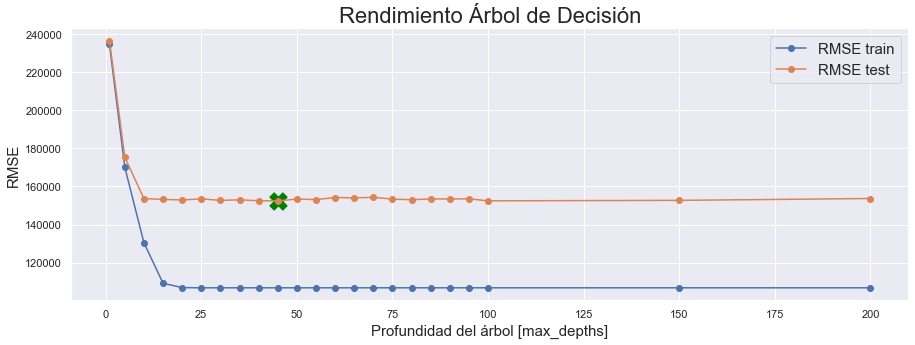

In [177]:
graph_arbol_rmse(list_tree_1_1a, list_tree_2_1a,max_depths)

* Estimar hiperparámetro para el arbol a partir de R cuadrado

In [111]:
max_depths = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,150,200]

In [139]:
list_tree_1_1b, list_tree_2_1b = flop_arbol_r(X_train, y_train, X_test, y_test, max_depths)

El máximo de R^2 en test es  0.7463748321545536  en  30  profundidad del árbol.


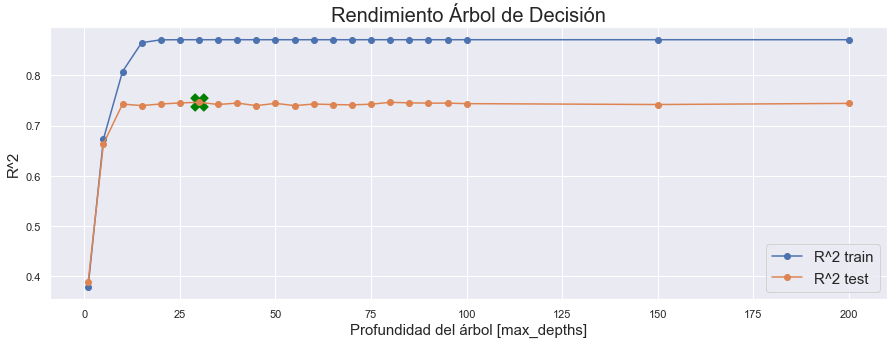

In [140]:
graph_arbol_r(list_tree_1_1b, list_tree_2_1b,max_depths)

In [142]:
tree_reg_1 = DecisionTreeRegressor(max_depth = 65)
tree_reg_1.fit(X_train, y_train)
y_train_pred_tree_1 = tree_reg_1.predict(X_train)
y_test_pred_tree_1 = tree_reg_1.predict(X_test)

rmse_train_tree_1 = np.sqrt(mean_squared_error(y_train, y_train_pred_tree_1))
rmse_test_tree_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_tree_1))
r_tree_train_1 = metrics.r2_score(y_train, y_train_pred_tree_1)
r_tree_test_1 = metrics.r2_score(y_test, y_test_pred_tree_1)

print(f'Raíz del error cuadrático medio - Train: {round(rmse_train_tree_1,3)}')
print(f'Raíz del error cuadrático medio - Test : {round(rmse_test_tree_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Train: {round(r_tree_train_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Test : {round(r_tree_test_1,3)}')

Raíz del error cuadrático medio - Train: 106793.833
Raíz del error cuadrático medio - Test : 153216.857
Ajuste del valor de R cuadrado  - Train: 0.871
Ajuste del valor de R cuadrado  - Test : 0.743


Se han explorado distintos valores máximo para la profundidad (hasta 80.000) encontrandose un valor adecuado a partir de las dos métricas en 15. Se observó que dado otros valores de profundidad (cómo un valor de 100)se encuentra un ajuste R cuadrado para el conjunto Train de 0.956. Aun así, el valor para test sigue igual. El conjunto test es el de interés y se elige un valor de profundidad de 15 para el árbol de decisión de este primer caso.

### Modelo KNN

* Estimar hiperparámetro para el modelo KNN a partir de RMSE

In [115]:
vecino = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50,60,70,80,100,150,200]

In [116]:
list_knn_1_1a, list_knn_2_1a = flop_knn_rmse(X_train, y_train, X_test, y_test, vecino)

Minimo de RMSE en test es  156259.8721901655  en vecinos 7


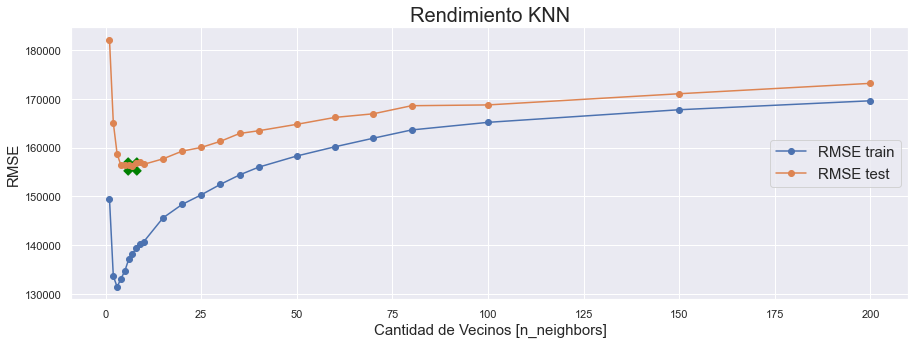

In [117]:
graph_knn_rmse(list_knn_1_1a, list_knn_2_1a,vecino)

* Estimar hiperparámetro para el arbol a partir de R cuadrado

In [118]:
vecino = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50,60,70,80,100,150,200]

In [119]:
list_knn_1_1a, list_knn_2_1a = flop_knn_r(X_train,y_train,X_test,y_test,vecino)

Maximo ajuste de R en test es  0.7327992507234077  en vecinos 7


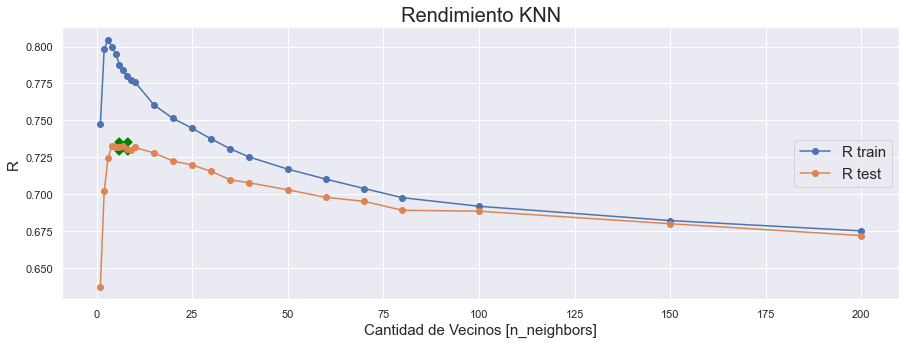

In [120]:
graph_knn_r(list_knn_1_1a, list_knn_2_1a,vecino)

Por cuestiones de espacio de RAM disponible en mi computadora, solo logré explorar hasta un máximo de 2.000 vecinos. Aun así, se observar el comportamiento en cresta de las metricas. Es posible que el error aumente debido a la forma en que se encuentra distribuidos los datos (como se observa en el PairPlot) en donde un número elevado de vecinos daña el ajuste.

In [121]:
knn_reg_1 = KNeighborsRegressor(n_neighbors = 3)

knn_reg_1.fit(X_train, y_train) 

y_train_pred_knn_1 = knn_reg_1.predict(X_train)
y_test_pred_knn_1 = knn_reg_1.predict(X_test)

rmse_train_knn_1 = np.sqrt(mean_squared_error(y_train, y_train_pred_knn_1))
rmse_test_knn_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_knn_1))
r_knn_train_1 = metrics.r2_score(y_train, y_train_pred_knn_1)
r_knn_test_1 = metrics.r2_score(y_test, y_test_pred_knn_1)

Se elige un número de vecinos 3 y se crea el modelo de dicha forma. En el siguiente apartado se realiza la evaluación de los 3 modelos para este primer caso.

## Comparación de modelos

In [128]:
print(f'Raíz del error cuadrático medio - Modelo de regresión Lineal - Train: {round(rmse_lin_train_1,3)}')
print(f'Raíz del error cuadrático medio - Modelo de regresión Lineal - Test : {round(rmse_lin_test_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Test : {round(r_lin_test_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Train: {round(r_lin_train_1,3)}')
print('-----------------------------------------------------------------------------------------')
print(f'Raíz del error cuadrático medio - Modelo árbol de regresión  - Train: {round(rmse_train_tree_1,3)}')
print(f'Raíz del error cuadrático medio - Modelo árbol de regresión  - Test : {round(rmse_test_tree_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Train: {round(r_tree_test_1,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Test : {round(r_tree_test_1,3)}')
print('-----------------------------------------------------------------------------------------')
print(f'Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Train: {round(rmse_train_knn_1,3)}')
print(f'Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Test : {round(rmse_test_knn_1,3)}')
print(f'Valor R cuadradp para el modelo - Modelo K-Vecinos regresor  - Train: {round(r_knn_train_1,3)}')
print(f'Valor R cuadrado para el modelo - Modelo K-Vecinos regresor  - Test : {round(r_knn_test_1,3)}')

Raíz del error cuadrático medio - Modelo de regresión Lineal - Train: 224281.769
Raíz del error cuadrático medio - Modelo de regresión Lineal - Test : 232344.957
Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Test : 0.409
Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Train: 0.432
-----------------------------------------------------------------------------------------
Raíz del error cuadrático medio - Modelo árbol de regresión  - Train: 109206.181
Raíz del error cuadrático medio - Modelo árbol de regresión  - Test : 153376.053
Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Train: 0.743
Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Test : 0.743
-----------------------------------------------------------------------------------------
Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Train: 131499.542
Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Test : 158684.649
Valor R cuadradp para el model

Se observa que el modelo de árbol de decisión para el conjunto test obtiene el mejor ajuste en ambas métricas. Se observa un ajuste adecuado para el conjunto train en el modelo de K-Vecinos.

## Cálculo y gráfica de errores y ajuste del modelo

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 52460.90877279167
Raíz del error cuadrático medio en Test: 150792.88676327674


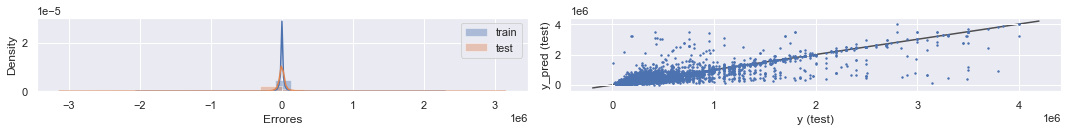

Modelo: Vecinos más cercanos - KNN
Raíz del error cuadrático medio en Train: 103804.20852724434
Raíz del error cuadrático medio en Test: 152317.82229037234


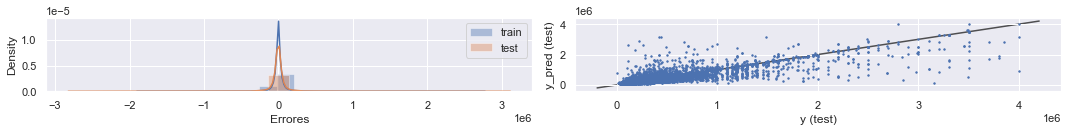

Modelo: Regresión Lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361593


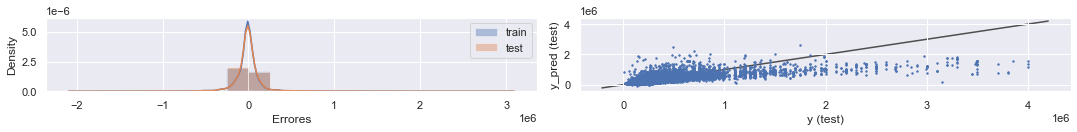

In [131]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos - KNN', 'Regresión Lineal',]

for i, model in enumerate([tree_reg_1, knn_reg_1, lineal_reg_1]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (15,2))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('Errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.savefig('dos.png')
    
    plt.tight_layout()
    plt.show()

Modelo: Árbol de Decisión
R-Cuadrado en Train: 0.9689050509344366
R-Cuadrado en Test: 0.7511690183385822


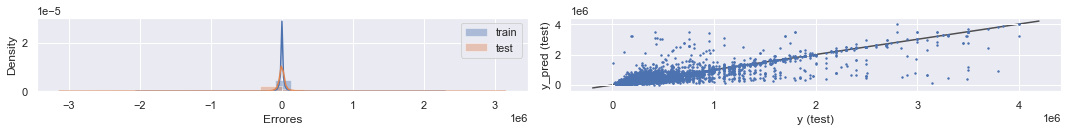

Modelo: Vecinos más cercanos - KNN
R-Cuadrado en Train: 0.8782558355018295
R-Cuadrado en Test: 0.7461108240704453


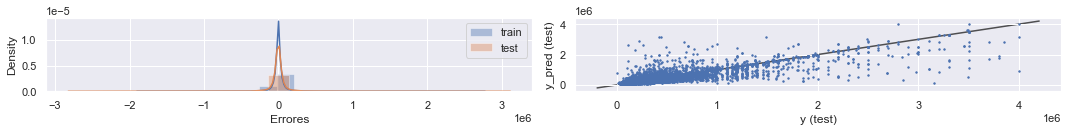

Modelo: Regresión Lineal
R-Cuadrado en Train: 0.5517887107017188
R-Cuadrado en Test: 0.5514864358797195


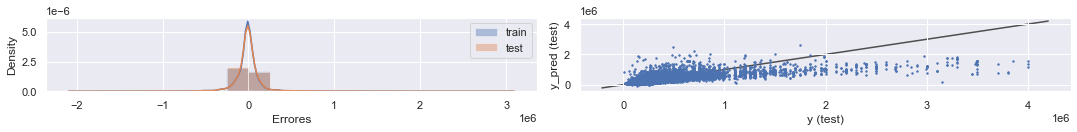

In [132]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos - KNN', 'Regresión Lineal',]

for i, model in enumerate([tree_reg_1, knn_reg_1, lineal_reg_1]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    r_train = metrics.r2_score(y_train, y_train_pred)
    r_test = metrics.r2_score(y_test, y_test_pred)
    print(f'R-Cuadrado en Train: {r_train}')
    print(f'R-Cuadrado en Test: {r_test}')
    
    plt.figure(figsize = (15,2))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('Errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

De los gráficos de error. Observamos que, a diferencia del modelo Benchmark (regresión lineal), los modelos de árbol de decisión y K-Vecinos se ajustan de una forma un poco más clara al conjunto de datos teniendo errores relativamente bajos.

## Caso 2.

Para el caso 2, como se mencionaba en la metodología. Se explorarán los modelos a partir del Dataset limpio realizado en los puntos 1 y 2. Esto con el fin de observar el comportamiento del modelo.

### Modelo Benchmark

Se construye el modelo Benchmark a partir de regresión lineal.

In [123]:
lineal_reg_2 = LinearRegression()

lineal_reg_2.fit(X_train2, y_train2)

y_train_pred_lin_2 = lineal_reg_2.predict(X_train2)
y_test_pred_lin_2 = lineal_reg_2.predict(X_test2)

rmse_lin_train_2 = np.sqrt(mean_squared_error(y_train2, y_train_pred_lin_2))
rmse_lin_test_2 = np.sqrt(mean_squared_error(y_test2, y_test_pred_lin_2))
r_lin_train_2 = metrics.r2_score(y_train2, y_train_pred_lin_2)
r_lin_test_2 = metrics.r2_score(y_test2, y_test_pred_lin_2)

### Modelo Arbol de decision

* Estimar hiperparámetro para el modelo de árbol a partir de RMSE

El mínimo de RMSE en test es  46971.200158116524  en  16  profundidad del árbol.


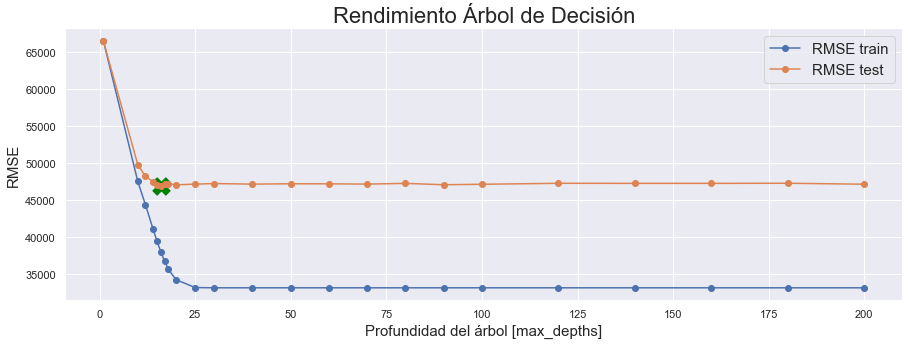

In [143]:
max_depths = [1,10,12,14,15,16,17,18,20,25,30,40,50,60,70,80,90,100,120,140,160,180,200]
list_tree_1_2a, list_tree_2_2a = flop_arbol_rmse(X_train2,y_train2, X_test2, y_test2, max_depths)
graph_arbol_rmse(list_tree_1_2a, list_tree_2_2a,max_depths)

* Estimar hiperparámetro para el modelo de arbol a partir de R cuadrado

El máximo de R^2 en test es  0.7132762824743535  en  16  profundidad del árbol.


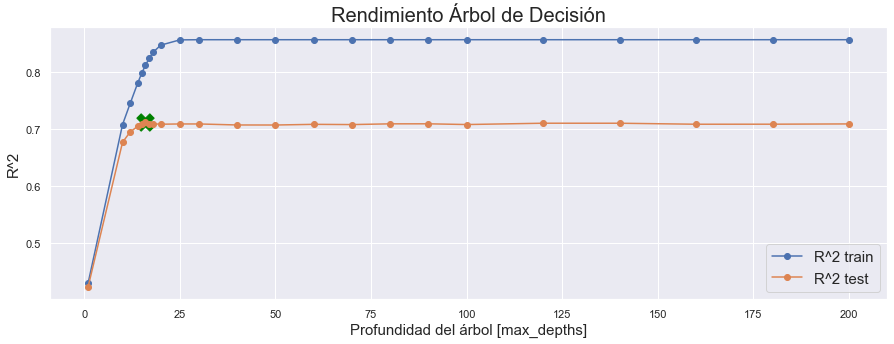

In [146]:
max_depths = [1,10,12,14,15,16,17,18,20,25,30,40,50,60,70,80,90,100,120,140,160,180,200]
list_tree_1_2b, list_tree_2_2b = flop_arbol_r(X_train2,y_train2, X_test2, y_test2, max_depths)
graph_arbol_r(list_tree_1_2b, list_tree_2_2b,max_depths)

In [145]:
tree_reg_2 = DecisionTreeRegressor(max_depth = 16)
tree_reg_2.fit(X_train2, y_train2)
y_train_pred_tree_2 = tree_reg_2.predict(X_train2)
y_test_pred_tree_2 = tree_reg_2.predict(X_test2)

rmse_train_tree_2 = np.sqrt(mean_squared_error(y_train2, y_train_pred_tree_2))
rmse_test_tree_2 = np.sqrt(mean_squared_error(y_test2, y_test_pred_tree_2))
r_tree_train_2 = metrics.r2_score(y_train2, y_train_pred_tree_2)
r_tree_test_2 = metrics.r2_score(y_test2, y_test_pred_tree_2)

### Modelo KNN

* Estimar hiperparámetro para el modelo KNN a partir de RMSE

Minimo de RMSE en test es  47846.5921828045  en vecinos 7


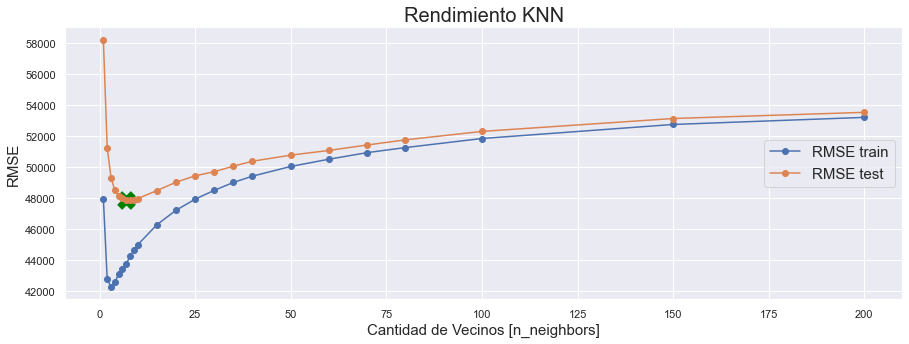

In [142]:
vecino = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50,60,70,80,100,150,200]
list_knn_1_2a, list_knn_2_2a = flop_knn_rmse(X_train2, y_train2, X_test2, y_test2, vecino)
graph_knn_rmse(list_knn_1_2a, list_knn_2_2a,vecino)

* Estimar hiperparámetro para el modelo KNN a partir del ajuste de R cuadrado.

Maximo ajuste de R en test es  0.7029964054276671  en vecinos 7


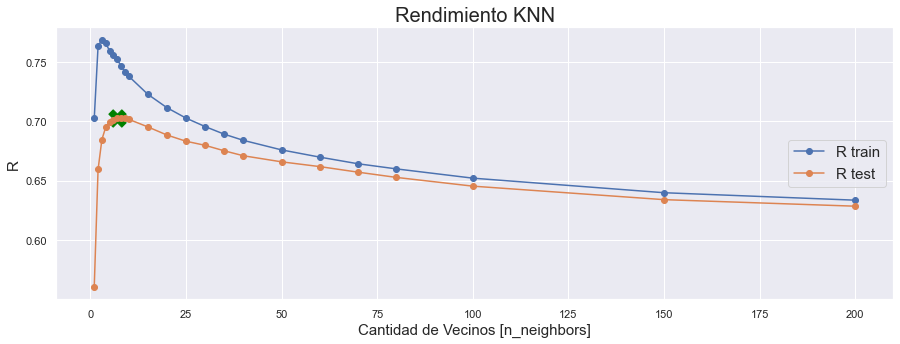

In [144]:
vecino = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50,60,70,80,100,150,200]
list_knn_1_2b, list_knn_2_2b = flop_knn_r(X_train2, y_train2, X_test2, y_test2, vecino)
graph_knn_r(list_knn_1_2b, list_knn_2_2b,vecino)

In [125]:
knn_reg_2 = KNeighborsRegressor(n_neighbors = 7)

knn_reg_2.fit(X_train2, y_train2) 

y_train_pred_knn_2 = knn_reg_2.predict(X_train2)
y_test_pred_knn_2 = knn_reg_2.predict(X_test2)

rmse_train_knn_2 = np.sqrt(mean_squared_error(y_train2, y_train_pred_knn_2))
rmse_test_knn_2 = np.sqrt(mean_squared_error(y_test2, y_test_pred_knn_2))
r_knn_train_2 = metrics.r2_score(y_train2, y_train_pred_knn_2)
r_knn_test_2 = metrics.r2_score(y_test2, y_test_pred_knn_2)

## Cálculo y gráfica de errores y ajuste del modelo

In [129]:
print(f'Raíz del error cuadrático medio - Modelo de regresión Lineal - Train: {round(rmse_lin_train_2,3)}')
print(f'Raíz del error cuadrático medio - Modelo de regresión Lineal - Test : {round(rmse_lin_test_2,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Test : {round(r_lin_test_2,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Train: {round(r_lin_train_2,3)}')
print('-----------------------------------------------------------------------------------------')
print(f'Raíz del error cuadrático medio - Modelo árbol de regresión  - Train: {round(rmse_train_tree_2,3)}')
print(f'Raíz del error cuadrático medio - Modelo árbol de regresión  - Test : {round(rmse_test_tree_2,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Train: {round(r_tree_test_2,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Test : {round(r_tree_test_2,3)}')
print('-----------------------------------------------------------------------------------------')
print(f'Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Train: {round(rmse_train_knn_2,3)}')
print(f'Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Test : {round(rmse_test_knn_2,3)}')
print(f'Valor R cuadradp para el modelo - Modelo K-Vecinos regresor  - Test : {round(r_knn_test_2,3)}')
print(f'Valor R cuadrado para el modelo - Modelo K-Vecinos regresor  - Train: {round(r_knn_train_2,3)}')

Raíz del error cuadrático medio - Modelo de regresión Lineal - Train: 55562.574
Raíz del error cuadrático medio - Modelo de regresión Lineal - Test : 55774.691
Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Test : 0.593
Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Train: 0.601
-----------------------------------------------------------------------------------------
Raíz del error cuadrático medio - Modelo árbol de regresión  - Train: 38075.798
Raíz del error cuadrático medio - Modelo árbol de regresión  - Test : 46910.338
Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Train: 0.712
Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Test : 0.712
-----------------------------------------------------------------------------------------
Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Train: 43736.441
Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Test : 48550.5
Valor R cuadradp para el modelo - Mode

De los modelos realizados, se observa nuevamente el modelo de árbol de decisión como el más adecuado segun las metricas y a partir del conjunto test que es el de mayor interés. Aun así, es de resaltar que la diferencia con el árbol de regresión no es muy notoría. Particularmente, observo que la exploración que realicé no mejoró de forma significativa el modelo, incluso, no se observa una mejora propiamente dicha en las métricas.

De tal forma, decido realizar un modelo para cada tipo de propiedad utilizando el mismo dataset en el caso 2.

## Caso 3

Con el ánimo de acelerar el desarrollo de cada uno de los modelos para los 3 datasets filtrados, se utilizará solo la metrica de RMSE para la evaluación del modelo. Se escoge la misma debido a qué es la más popular para la evaluación de los modelos de regresión y que, además, en los modelos anteriores se observar que no se diferencia mucho en comparación al valor de ajuste del R cuadrado.

### Se definirán funciones para acelerar el proceso de análisis para el caso 3

Para el ajuste del hiperparámetro se trabajará el valor de R cuadrado. Se construirá el modelo y se evaluará.

##### Para Departamentos

* Modelo Benchmark

In [168]:
lineal_reg_3a = LinearRegression()
lineal_reg_3a.fit(X_train3a, y_train3a)

y_train_pred_lin_3a = lineal_reg_3a.predict(X_train3a)
y_test_pred_lin_3a = lineal_reg_3a.predict(X_test3a)

rmse_lin_train_3a = np.sqrt(mean_squared_error(y_train3a, y_train_pred_lin_3a))
rmse_lin_test_3a = np.sqrt(mean_squared_error(y_test3a, y_test_pred_lin_3a))
r_lin_train_3a = metrics.r2_score(y_train3a, y_train_pred_lin_3a)
r_lin_test_3a = metrics.r2_score(y_test3a, y_test_pred_lin_3a)

* Árbol de regresión

El máximo de R^2 en test es  0.733605079631761  en  18  profundidad del árbol.


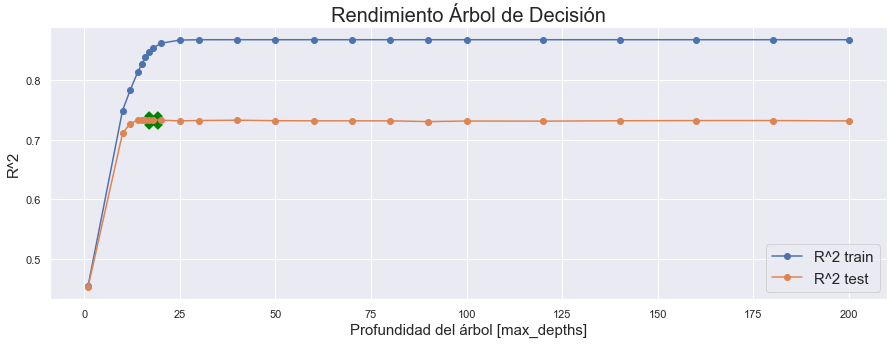

In [162]:
max_depths = [1,10,12,14,15,16,17,18,20,25,30,40,50,60,70,80,90,100,120,140,160,180,200]
list_tree_1_3a, list_tree_2_3a = flop_arbol_r(X_train3a, y_train3a, X_test3a, y_test3a, max_depths)
graph_arbol_r(list_tree_1_3a, list_tree_2_3a,max_depths)

In [169]:
tree_reg_3a = DecisionTreeRegressor(max_depth = 18)
tree_reg_3a.fit(X_train3a, y_train3a)
y_train_pred_tree_3a = tree_reg_3a.predict(X_train3a)
y_test_pred_tree_3a = tree_reg_3a.predict(X_test3a)

rmse_train_tree_3a = np.sqrt(mean_squared_error(y_train3a, y_train_pred_tree_3a))
rmse_test_tree_3a = np.sqrt(mean_squared_error(y_test3a, y_test_pred_tree_3a))
r_tree_train_3a = metrics.r2_score(y_train3a, y_train_pred_tree_3a)
r_tree_test_3a = metrics.r2_score(y_test3a, y_test_pred_tree_3a)

* Para el modelo de K-Vecinos

Maximo ajuste de R en test es  0.7336312406356635  en vecinos 8


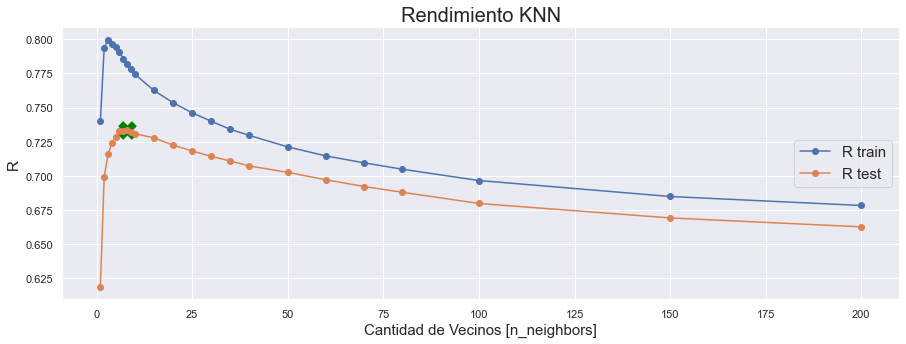

In [163]:
vecino = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50,60,70,80,100,150,200]
list_knn_1_3a, list_knn_2_3a = flop_knn_r(X_train3a, y_train3a, X_test3a, y_test3a, vecino)
graph_knn_r(list_knn_1_3a, list_knn_2_3a,vecino)

In [170]:
knn_reg_3a = KNeighborsRegressor(n_neighbors = 8)

knn_reg_3a.fit(X_train3a, y_train3a) 

y_train_pred_knn_3a = knn_reg_3a.predict(X_train3a)
y_test_pred_knn_3a = knn_reg_3a.predict(X_test3a)

rmse_train_knn_3a = np.sqrt(mean_squared_error(y_train3a, y_train_pred_knn_3a))
rmse_test_knn_3a = np.sqrt(mean_squared_error(y_test3a, y_test_pred_knn_3a))
r_knn_train_3a = metrics.r2_score(y_train3a, y_train_pred_knn_3a)
r_knn_test_3a = metrics.r2_score(y_test3a, y_test_pred_knn_3a)

##### Teniéndose:

In [173]:
print(f'Raíz del error cuadrático medio - Modelo de regresión Lineal - Train: {round(rmse_lin_train_3a,3)}')
print(f'Raíz del error cuadrático medio - Modelo de regresión Lineal - Test : {round(rmse_lin_test_3a,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Test : {round(r_lin_test_3a,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Train: {round(r_lin_train_3a,3)}')
print('-----------------------------------------------------------------------------------------')
print(f'Raíz del error cuadrático medio - Modelo árbol de regresión  - Train: {round(rmse_train_tree_3a,3)}')
print(f'Raíz del error cuadrático medio - Modelo árbol de regresión  - Test : {round(rmse_test_tree_3a,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Train: {round(r_tree_train_3a,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Test : {round(r_tree_train_3a,3)}')
print('-----------------------------------------------------------------------------------------')
print(f'Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Train: {round(rmse_train_knn_3a,3)}')
print(f'Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Test : {round(rmse_test_knn_3a,3)}')
print(f'Valor R cuadradp para el modelo - Modelo K-Vecinos regresor  - Test : {round(r_knn_test_3a,3)}')
print(f'Valor R cuadrado para el modelo - Modelo K-Vecinos regresor  - Train: {round(r_knn_train_3a,3)}')

Raíz del error cuadrático medio - Modelo de regresión Lineal - Train: 52662.163
Raíz del error cuadrático medio - Modelo de regresión Lineal - Test : 52315.484
Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Test : 0.642
Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Train: 0.648
-----------------------------------------------------------------------------------------
Raíz del error cuadrático medio - Modelo árbol de regresión  - Train: 33784.162
Raíz del error cuadrático medio - Modelo árbol de regresión  - Test : 44721.711
Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Train: 0.855
Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Test : 0.855
-----------------------------------------------------------------------------------------
Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Train: 41440.411
Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Test : 45219.668
Valor R cuadradp para el modelo - Mo

¡Se logra un mejor ajuste! Aunque el mismo no sea relativamente importante. Se logra evidenciar un mejor ajuste en todos los modelos. Aun así, en este punto, pienso que los demás modelos tendrán ciertas falencias debido al tamaño del dataset. Es decir, se observa que, para el caso del tipo de propiedad Departamentos, se cuenta con una cantidad mayor de datos en comparación de los demás tipos de propiedad.

##### Para Casas

* Creamos un Modelo Benchmark.

In [164]:
lineal_reg_3b = LinearRegression()
lineal_reg_3b.fit(X_train3b, y_train3b)

y_train_pred_lin_3b = lineal_reg_3b.predict(X_train3b)
y_test_pred_lin_3b = lineal_reg_3b.predict(X_test3b)

rmse_lin_train_3b = np.sqrt(mean_squared_error(y_train3b, y_train_pred_lin_3b))
rmse_lin_test_3b = np.sqrt(mean_squared_error(y_test3b, y_test_pred_lin_3b))
r_lin_train_3b = metrics.r2_score(y_train3b, y_train_pred_lin_3b)
r_lin_test_3b = metrics.r2_score(y_test3b, y_test_pred_lin_3b)

* **Árbol regresor:** Buscamos el ajuste al hiperparámetro y generamos el modelo.

El máximo de R^2 en test es  0.12236311781868436  en  10  profundidad del árbol.


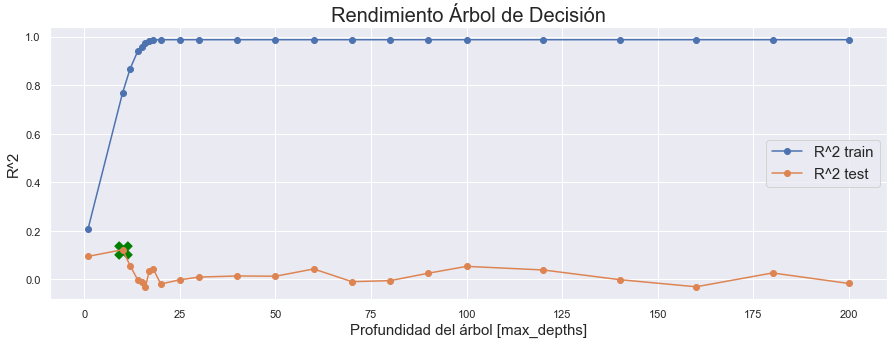

In [161]:
max_depths = [1,10,12,14,15,16,17,18,20,25,30,40,50,60,70,80,90,100,120,140,160,180,200]
list_tree_1_3b, list_tree_2_3b = flop_arbol_r(X_train3b, y_train3b, X_test3b, y_test3b, max_depths)
graph_arbol_r(list_tree_1_3b, list_tree_2_3b,max_depths)

In [165]:
tree_reg_3b = DecisionTreeRegressor(max_depth = 10)
tree_reg_3b.fit(X_train3b, y_train3b)
y_train_pred_tree_3b = tree_reg_3b.predict(X_train3b)
y_test_pred_tree_3b = tree_reg_3b.predict(X_test3b)

rmse_train_tree_3b = np.sqrt(mean_squared_error(y_train3b, y_train_pred_tree_3b))
rmse_test_tree_3b = np.sqrt(mean_squared_error(y_test3b, y_test_pred_tree_3b))
r_tree_train_3b = metrics.r2_score(y_train3b, y_train_pred_tree_3b)
r_tree_test_3b = metrics.r2_score(y_test3b, y_test_pred_tree_3b)

* **K-Vecinos:** Buscamos el ajuste al hiperparámetro y generamos el modelo.

Maximo ajuste de R en test es  0.22062409926283377  en vecinos 100


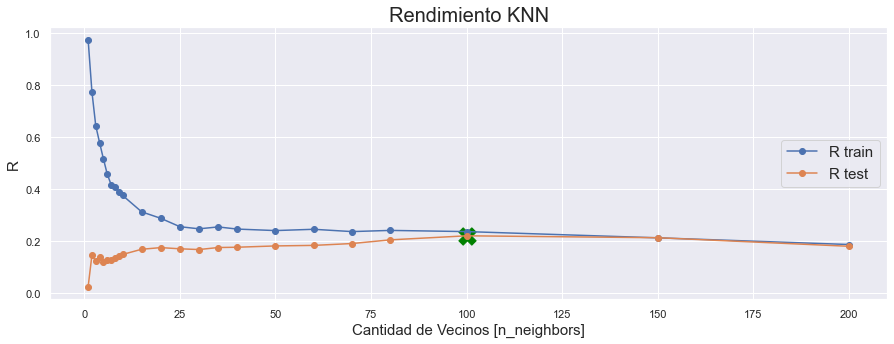

In [160]:
vecino = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50,60,70,80,100,150,200]
list_knn_1_3b, list_knn_2_3b = flop_knn_r(X_train3b, y_train3b, X_test3b, y_test3b, vecino)
graph_knn_r(list_knn_1_3b, list_knn_2_3b, vecino)

In [166]:
knn_reg_3b = KNeighborsRegressor(n_neighbors = 100)

knn_reg_3b.fit(X_train3b, y_train3b) 

y_train_pred_knn_3b = knn_reg_3b.predict(X_train3b)
y_test_pred_knn_3b = knn_reg_3b.predict(X_test3b)

rmse_train_knn_3b = np.sqrt(mean_squared_error(y_train3b, y_train_pred_knn_3b))
rmse_test_knn_3b = np.sqrt(mean_squared_error(y_test3b, y_test_pred_knn_3b))
r_knn_train_3b = metrics.r2_score(y_train3b, y_train_pred_knn_3b)
r_knn_test_3b = metrics.r2_score(y_test3b, y_test_pred_knn_3b)

##### Teniendose:

In [167]:
print(f'Raíz del error cuadrático medio - Modelo de regresión Lineal - Train: {round(rmse_lin_train_3b,3)}')
print(f'Raíz del error cuadrático medio - Modelo de regresión Lineal - Test : {round(rmse_lin_test_3b,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Test : {round(r_lin_test_3b,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Train: {round(r_lin_train_3b,3)}')
print('-----------------------------------------------------------------------------------------')
print(f'Raíz del error cuadrático medio - Modelo árbol de regresión  - Train: {round(rmse_train_tree_3b,3)}')
print(f'Raíz del error cuadrático medio - Modelo árbol de regresión  - Test : {round(rmse_test_tree_3b,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Train: {round(r_tree_test_3b,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Test : {round(r_tree_test_3b,3)}')
print('-----------------------------------------------------------------------------------------')
print(f'Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Train: {round(rmse_train_knn_3b,3)}')
print(f'Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Test : {round(rmse_test_knn_3b,3)}')
print(f'Valor R cuadradp para el modelo - Modelo K-Vecinos regresor  - Test : {round(r_knn_test_3b,3)}')
print(f'Valor R cuadrado para el modelo - Modelo K-Vecinos regresor  - Train: {round(r_knn_train_3b,3)}')

Raíz del error cuadrático medio - Modelo de regresión Lineal - Train: 71169.511
Raíz del error cuadrático medio - Modelo de regresión Lineal - Test : 74130.824
Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Test : 0.268
Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Train: 0.282
-----------------------------------------------------------------------------------------
Raíz del error cuadrático medio - Modelo árbol de regresión  - Train: 40774.581
Raíz del error cuadrático medio - Modelo árbol de regresión  - Test : 78815.619
Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Train: 0.173
Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Test : 0.173
-----------------------------------------------------------------------------------------
Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Train: 74203.388
Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Test : 77177.579
Valor R cuadradp para el modelo - Mo

Para el tipo de proiedad: Casas, el ajuste cae completamente. Se observa que el error aumenta considerablemente.

Observando los datos para el caso 3b para X y y en Train y Test observo que tiene un tamaño considerablemente menor en comparación a los demás tipo de propiedad. Exploraremos los PH y observaremos su comportamiento.

##### Para PH

* Iniciamos con un modelo Benchmark.

In [159]:
lineal_reg_3c = LinearRegression()
lineal_reg_3c.fit(X_train3c, y_train3c)

y_train_pred_lin_3c = lineal_reg_3c.predict(X_train3c)
y_test_pred_lin_3c = lineal_reg_3c.predict(X_test3c)

rmse_lin_train_3c = np.sqrt(mean_squared_error(y_train3c, y_train_pred_lin_3c))
rmse_lin_test_3c = np.sqrt(mean_squared_error(y_test3c, y_test_pred_lin_3c))
r_lin_train_3c = metrics.r2_score(y_train3c, y_train_pred_lin_3c)
r_lin_test_3c = metrics.r2_score(y_test3c, y_test_pred_lin_3c)

* **Árbol regresor:** Buscamos el ajuste al hiperparámetro y generamos el modelo.

El máximo de R^2 en test es  0.683822595321128  en  16  profundidad del árbol.


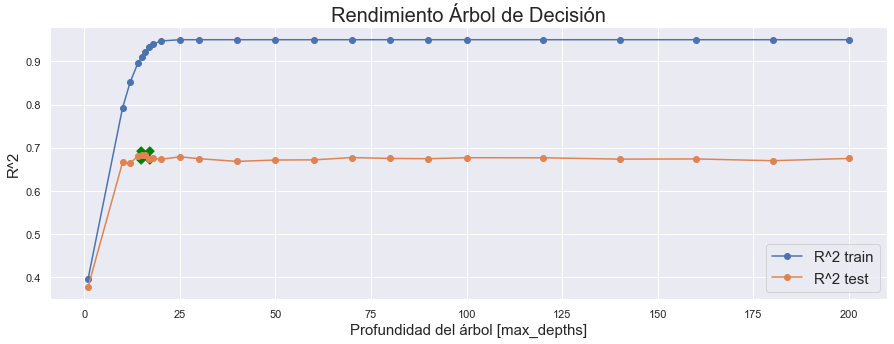

In [158]:
max_depths = [1,10,12,14,15,16,17,18,20,25,30,40,50,60,70,80,90,100,120,140,160,180,200]
list_tree_1_3c, list_tree_2_3c = flop_arbol_r(X_train3c, y_train3c, X_test3c, y_test3c, max_depths)
graph_arbol_r(list_tree_1_3c, list_tree_2_3c,max_depths)

In [161]:
tree_reg_3c = DecisionTreeRegressor(max_depth = 16)
tree_reg_3c.fit(X_train3c, y_train3c)
y_train_pred_tree_3c = tree_reg_3c.predict(X_train3c)
y_test_pred_tree_3c = tree_reg_3c.predict(X_test3c)

rmse_train_tree_3c = np.sqrt(mean_squared_error(y_train3c, y_train_pred_tree_3c))
rmse_test_tree_3c = np.sqrt(mean_squared_error(y_test3c, y_test_pred_tree_3c))
r_tree_train_3c = metrics.r2_score(y_train3c, y_train_pred_tree_3c)
r_tree_test_3c = metrics.r2_score(y_test3c, y_test_pred_tree_3c)

* **K-Vecinos:** Buscamos el ajuste al hiperparámetro y generamos el modelo.

Maximo ajuste de R en test es  0.6727000209054524  en vecinos 3


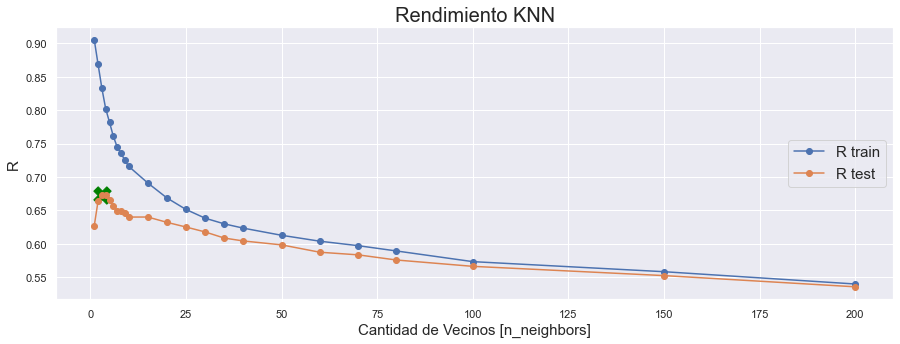

In [159]:
vecino = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50,60,70,80,100,150,200]
list_knn_1_3c, list_knn_2_3c = flop_knn_r(X_train3c, y_train3c, X_test3c, y_test3c, vecino)
graph_knn_r(list_knn_1_3c, list_knn_2_3c,vecino)

In [162]:
knn_reg_3c = KNeighborsRegressor(n_neighbors = 3)

knn_reg_3c.fit(X_train3c, y_train3c) 

y_train_pred_knn_3c = knn_reg_3c.predict(X_train3c)
y_test_pred_knn_3c = knn_reg_3c.predict(X_test3c)

rmse_train_knn_3c = np.sqrt(mean_squared_error(y_train3c, y_train_pred_knn_3c))
rmse_test_knn_3c = np.sqrt(mean_squared_error(y_test3c, y_test_pred_knn_3c))
r_knn_train_3c = metrics.r2_score(y_train3c, y_train_pred_knn_3c)
r_knn_test_3c = metrics.r2_score(y_test3c, y_test_pred_knn_3c)

##### Teniéndose:

In [163]:
print(f'Raíz del error cuadrático medio - Modelo de regresión Lineal - Train: {round(rmse_lin_train_3c,3)}')
print(f'Raíz del error cuadrático medio - Modelo de regresión Lineal - Test : {round(rmse_lin_test_3c,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Test : {round(r_lin_test_3c,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Train: {round(r_lin_train_3c,3)}')
print('-----------------------------------------------------------------------------------------')
print(f'Raíz del error cuadrático medio - Modelo árbol de regresión  - Train: {round(rmse_train_tree_3c,3)}')
print(f'Raíz del error cuadrático medio - Modelo árbol de regresión  - Test : {round(rmse_test_tree_3c,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Train: {round(r_tree_test_3c,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Test : {round(r_tree_test_3c,3)}')
print('-----------------------------------------------------------------------------------------')
print(f'Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Train: {round(rmse_train_knn_3c,3)}')
print(f'Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Test : {round(rmse_test_knn_3c,3)}')
print(f'Valor R cuadradp para el modelo - Modelo K-Vecinos regresor  - Test : {round(r_knn_test_3c,3)}')
print(f'Valor R cuadrado para el modelo - Modelo K-Vecinos regresor  - Train: {round(r_knn_train_3c,3)}')

Raíz del error cuadrático medio - Modelo de regresión Lineal - Train: 56126.716
Raíz del error cuadrático medio - Modelo de regresión Lineal - Test : 54160.523
Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Test : 0.531
Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Train: 0.534
-----------------------------------------------------------------------------------------
Raíz del error cuadrático medio - Modelo árbol de regresión  - Train: 23357.371
Raíz del error cuadrático medio - Modelo árbol de regresión  - Test : 46145.333
Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Train: 0.659
Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Test : 0.659
-----------------------------------------------------------------------------------------
Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Train: 33531.261
Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Test : 47218.473
Valor R cuadradp para el modelo - Mo

Nuevamente, obtenemos un modelo con un ajuste poco agradable para las métricas utilizadas. Podemos considerar el tamaño de los datasets como un factor, o bien, el comportamiento de los datos para cada uno de los diferentes tipos de propiedad que tal vez no se ajusten para el modelo de regresión lineal.

Se plantea, entonces, que un módelo por tipo de propiedad no sería conveniente debido al limitante de datos actuales. Ahora, se buscará evaluar los features del dataset. Se utilizaran dos procedimientos: Análisis de Multicolinealidad a partir del VIF y el análisis de ranking de los features a partir de RFE/VRF.

### Exploración de ajuste de features

### 1. Multicolinealidad
Cómo se mencionó en los mapas de calor, se identificarán features adecuados y se evaluará de nuevo el modelo.

#### Factor Inflación de la Varianza
* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden conservar.
* VIF > 5 : Las variables están altamente correlacionadas y se deben retirar.

Se manejará el dataset propuesto para el punto ML (Dataset caso 1)

In [72]:
vif_data = pd.DataFrame() 
vif_data["features"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

In [73]:
print(vif_data)

          features        VIF
0            rooms  34.445126
1         bedrooms  31.447220
2        bathrooms   7.229515
3    surface_total   5.950495
4  surface_covered   1.513939


Se encuentran los features rooms y bedrooms con un alto VIF. Aunque las demás variables presentan un valor mayor a 5; para efectos de este caso se eliminará una de las primeras (rooms o bedrooms). Se eliminarán rooms.

In [89]:
X = data_ML.drop(['price','rooms'], axis=1)
y = data_ML['price']

X_train4a, X_test4a, y_train4a, y_test4a = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train4a.shape, y_train4a.shape, X_test4a.shape, y_test4a.shape)

(56713, 4) (56713,) (24306, 4) (24306,)


##### Modelo Lineal (Benchmark)

In [90]:
lineal_reg_4a = LinearRegression()
lineal_reg_4a.fit(X_train4a, y_train4a)

y_train_pred_lin_4a = lineal_reg_4a.predict(X_train4a)
y_test_pred_lin_4a = lineal_reg_4a.predict(X_test4a)

rmse_lin_train_4a = np.sqrt(mean_squared_error(y_train4a, y_train_pred_lin_4a))
rmse_lin_test_4a = np.sqrt(mean_squared_error(y_test4a, y_test_pred_lin_4a))
r_lin_train_4a = metrics.r2_score(y_train4a, y_train_pred_lin_4a)
r_lin_test_4a = metrics.r2_score(y_test4a, y_test_pred_lin_4a)

##### Modelo árbol regresor.

Se realiza el ajuste del hiperparámetro.

El mínimo de RMSE en test es  145653.28071785337  en  15  profundidad del árbol.


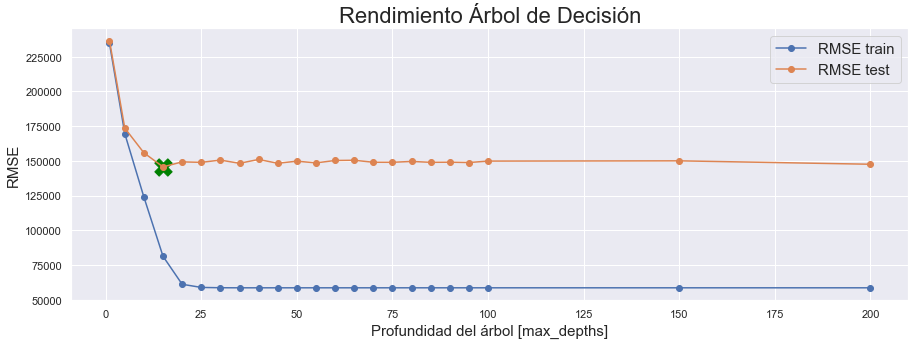

In [153]:
max_depths = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,150,200]
list_tree_1_4a, list_tree_2_4a = flop_arbol_rmse(X_train4a,y_train4a, X_test4a, y_test4a, max_depths)
graph_arbol_rmse(list_tree_1_4a, list_tree_2_4a,max_depths)

Se realiza el ajuste al hiperparámetro a partir de la gráfica anterior.

In [91]:
tree_reg_4a = DecisionTreeRegressor(max_depth=15)

tree_reg_4a.fit(X_train4a, y_train4a)

y_train_pred_tree_4a = tree_reg_4a.predict(X_train4a)
y_test_pred_tree_4a = tree_reg_4a.predict(X_test4a)

rmse_train_tree_4a = np.sqrt(mean_squared_error(y_train4a, y_train_pred_tree_4a))
rmse_test_tree_4a = np.sqrt(mean_squared_error(y_test4a, y_test_pred_tree_4a))
r_tree_train_4a = metrics.r2_score(y_train4a, y_train_pred_tree_4a)
r_tree_test_4a = metrics.r2_score(y_test4a, y_test_pred_tree_4a)

##### Modelo K-Vecinos

Se realiza el ajuste al hiperparámetro.

Minimo de RMSE en test es  152488.01967925057  en vecinos 3


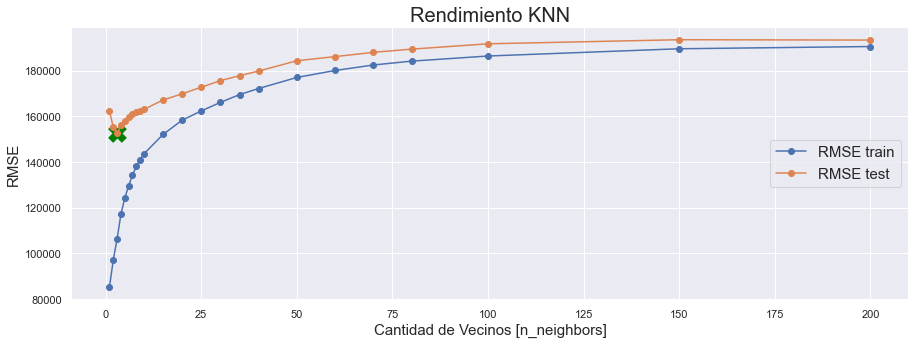

In [88]:
vecino = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50,60,70,80,100,150,200]
list_knn_1_4a, list_knn_2_4a = flop_knn_rmse(X_train4a, y_train4a, X_test4a, y_test4a, vecino)
graph_knn_rmse(list_knn_1_4a, list_knn_2_4a,vecino)

Se realiza el ajuste al modelo a partir de la gráfica.

In [92]:
knn_reg_4a = KNeighborsRegressor(n_neighbors = 3)

knn_reg_4a.fit(X_train4a, y_train4a) 

y_train_pred_knn_4a = knn_reg_4a.predict(X_train4a)
y_test_pred_knn_4a = knn_reg_4a.predict(X_test4a)

rmse_train_knn_4a = np.sqrt(mean_squared_error(y_train4a, y_train_pred_knn_4a))
rmse_test_knn_4a = np.sqrt(mean_squared_error(y_test4a, y_test_pred_knn_4a))
r_knn_train_4a = metrics.r2_score(y_train4a, y_train_pred_knn_4a)
r_knn_test_4a = metrics.r2_score(y_test4a, y_test_pred_knn_4a)

##### Teniéndose los siguientes resultados:

In [152]:
print(f'Raíz del error cuadrático medio - Modelo de regresión Lineal - Train: {round(rmse_lin_train_4a,3)}')
print(f'Raíz del error cuadrático medio - Modelo de regresión Lineal - Test : {round(rmse_lin_test_4a,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Test : {round(r_lin_test_4a,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Train: {round(r_lin_train_4a,3)}')
print('-----------------------------------------------------------------------------------------')
print(f'Raíz del error cuadrático medio - Modelo árbol de regresión  - Train: {round(rmse_train_tree_4a,3)}')
print(f'Raíz del error cuadrático medio - Modelo árbol de regresión  - Test : {round(rmse_test_tree_4a,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Train: {round(r_tree_test_4a,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Test : {round(r_tree_test_4a,3)}')
print('-----------------------------------------------------------------------------------------')
print(f'Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Train: {round(rmse_train_knn_4a,3)}')
print(f'Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Test : {round(rmse_test_knn_4a,3)}')
print(f'Valor R cuadradp para el modelo - Modelo K-Vecinos regresor  - Train: {round(r_knn_train_4a,3)}')
print(f'Valor R cuadrado para el modelo - Modelo K-Vecinos regresor  - Test : {round(r_knn_test_4a,3)}')

Raíz del error cuadrático medio - Modelo de regresión Lineal - Train: 199249.993
Raíz del error cuadrático medio - Modelo de regresión Lineal - Test : 202634.102
Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Test : 0.551
Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Train: 0.551
-----------------------------------------------------------------------------------------
Raíz del error cuadrático medio - Modelo árbol de regresión  - Train: 81242.368
Raíz del error cuadrático medio - Modelo árbol de regresión  - Test : 146021.716
Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Train: 0.767
Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Test : 0.767
-----------------------------------------------------------------------------------------
Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Train: 106407.453
Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Test : 152488.02
Valor R cuadradp para el modelo 

¡Obtenemos un mejor ajuste! Frente al modelo espuesto en el Caso 1, un tenemos un mayor ajuste en todos los modelos (aun no es muy significativo, es un paso!). Se observa un ajuste considerablemente alto para el modelo de K-Vecinos a partir del ajuste por VIF.

### 2. Selección de features por RFE/VRF

Ahora, utilizaremos un selector para evaluar los parámetros en un ranking del 1 al 3, donde 1 es la mejor opción y 3 la última mejor opción. Posteriormente cargaremos nuestros features - X con estos resultados y probaremos los modelos.

In [74]:
X = data_ML.drop(['price'], axis=1)
y = data_ML['price']

In [79]:
X

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,7.0,7.0,2.0,140.0,140.0
1,2.0,1.0,2.0,70.0,58.0
2,2.0,1.0,1.0,45.0,45.0
3,2.0,1.0,1.0,85.0,50.0
5,2.0,1.0,1.0,56.0,56.0
...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0
146555,3.0,2.0,2.0,144.0,134.0
146556,4.0,2.0,2.0,317.0,143.0
146557,3.0,2.0,2.0,145.0,145.0


In [76]:
%%time
estimator_ex = SVR(kernel="linear")
f_selector = RFE(estimator_ex, n_features_to_select=3, step=1)
f_selector = f_selector.fit(X,y)

Wall time: 28min 14s


In [77]:
f_selector.support_

array([False,  True,  True, False,  True])

In [78]:
f_selector.ranking_

array([2, 1, 1, 3, 1])

Obtenemos que rooms tiene un rankin de 2, surface_covered de 3 y los demás parámetros un ranking de 1. Cargamos de nuevo nuestas features X y comprobamos con los modelos.

In [80]:
X = data_ML[['bedrooms','bathrooms','surface_covered']]
y = data_ML['price']

In [94]:
X_train4b,X_test4b,y_train4b,y_test4b= train_test_split(X,y,test_size=0.30,random_state=42)
scale = preprocessing.StandardScaler()
scale.fit(X_train4b)
X_train4b = scale.transform(X_train4b)
X_test4b = scale.transform(X_test4b)

* Modelo Benchmark (Lineal)

In [95]:
lineal_reg_4b = LinearRegression()
lineal_reg_4b.fit(X_train4b, y_train4b)

y_train_pred_lin_4b = lineal_reg_4b.predict(X_train4b)
y_test_pred_lin_4b = lineal_reg_4b.predict(X_test4b)

rmse_lin_train_4b = np.sqrt(mean_squared_error(y_train4b, y_train_pred_lin_4b))
rmse_lin_test_4b = np.sqrt(mean_squared_error(y_test4b, y_test_pred_lin_4b))
r_lin_train_4b = metrics.r2_score(y_train4b, y_train_pred_lin_4b)
r_lin_test_4b = metrics.r2_score(y_test4b, y_test_pred_lin_4b)

* Módelo árbol Regresor

El mínimo de RMSE en test es  152107.58373935983  en  80  profundidad del árbol.


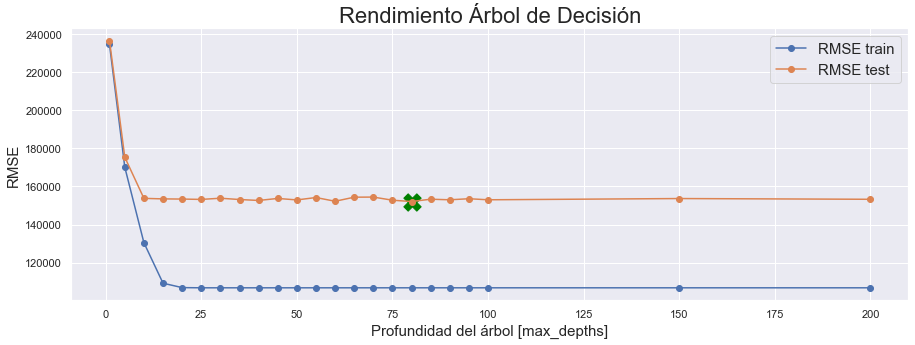

In [154]:
max_depths = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,150,200]
list_tree_1_4b, list_tree_2_4b = flop_arbol_rmse(X_train,y_train, X_test, y_test, max_depths)
graph_arbol_rmse(list_tree_1_4b, list_tree_2_4b,max_depths)

Se realiza el ajuste al hiperparámetro.

In [96]:
tree_reg_4b = DecisionTreeRegressor(max_depth=15)

tree_reg_4b.fit(X_train4b, y_train4b)

y_train_pred_tree_4b = tree_reg_4b.predict(X_train4b)
y_test_pred_tree_4b = tree_reg_4b.predict(X_test4b)

rmse_train_tree_4b = np.sqrt(mean_squared_error(y_train4b, y_train_pred_tree_4b))
rmse_test_tree_4b = np.sqrt(mean_squared_error(y_test4b, y_test_pred_tree_4b))
r_tree_train_4b = metrics.r2_score(y_train4b, y_train_pred_tree_4b)
r_tree_test_4b = metrics.r2_score(y_test4b, y_test_pred_tree_4b)

* Módelo K-Vecinos

Minimo de RMSE en test es  156259.8721901655  en vecinos 7


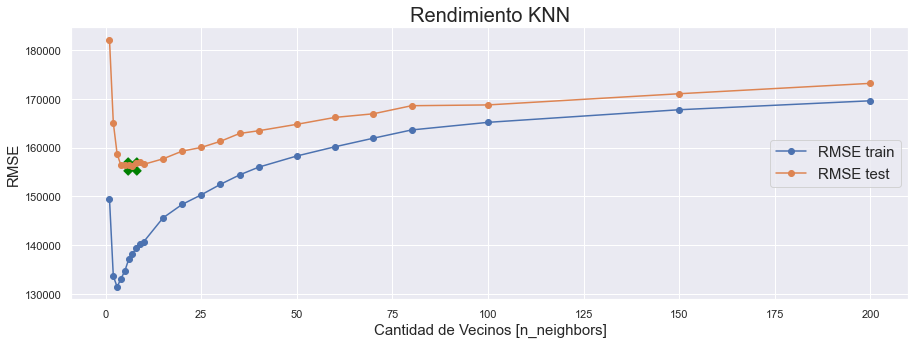

In [86]:
vecino = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50,60,70,80,100,150,200]
list_knn_1_4a, list_knn_2_4a = flop_knn_rmse(X_train, y_train, X_test, y_test, vecino)
graph_knn_rmse(list_knn_1_4a, list_knn_2_4a,vecino)

Se realiza el ajuste del hiperparámetro.

In [97]:
knn_reg_4b = KNeighborsRegressor(n_neighbors = 3)

knn_reg_4b.fit(X_train4b, y_train4b) 

y_train_pred_knn_4b = knn_reg_4b.predict(X_train4b)
y_test_pred_knn_4b = knn_reg_4b.predict(X_test4b)

rmse_train_knn_4b = np.sqrt(mean_squared_error(y_train4b, y_train_pred_knn_4b))
rmse_test_knn_4b = np.sqrt(mean_squared_error(y_test4b, y_test_pred_knn_4b))
r_knn_train_4b = metrics.r2_score(y_train4b, y_train_pred_knn_4b)
r_knn_test_4b = metrics.r2_score(y_test4b, y_test_pred_knn_4b)

Teniéndose:

In [157]:
print(f'Raíz del error cuadrático medio - Modelo de regresión Lineal - Train: {round(rmse_lin_train_4b,3)}')
print(f'Raíz del error cuadrático medio - Modelo de regresión Lineal - Test : {round(rmse_lin_test_4b,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Test : {round(r_lin_test_4b,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Train: {round(r_lin_train_4b,3)}')
print('-----------------------------------------------------------------------------------------')
print(f'Raíz del error cuadrático medio - Modelo árbol de regresión  - Train: {round(rmse_train_tree_4b,3)}')
print(f'Raíz del error cuadrático medio - Modelo árbol de regresión  - Test : {round(rmse_test_tree_4b,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Train: {round(r_tree_test_4b,3)}')
print(f'Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Test : {round(r_tree_test_4b,3)}')
print('-----------------------------------------------------------------------------------------')
print(f'Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Train: {round(rmse_train_knn_4b,3)}')
print(f'Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Test : {round(rmse_test_knn_4b,3)}')
print(f'Valor R cuadradp para el modelo - Modelo K-Vecinos regresor  - Train: {round(r_knn_train_4b,3)}')
print(f'Valor R cuadrado para el modelo - Modelo K-Vecinos regresor  - Test : {round(r_knn_test_4b,3)}')

Raíz del error cuadrático medio - Modelo de regresión Lineal - Train: 199249.993
Raíz del error cuadrático medio - Modelo de regresión Lineal - Test : 202634.102
Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Test : 0.551
Ajuste del valor de R cuadrado  - Modelo de regresión Lineal - Train: 0.551
-----------------------------------------------------------------------------------------
Raíz del error cuadrático medio - Modelo árbol de regresión  - Train: 81242.368
Raíz del error cuadrático medio - Modelo árbol de regresión  - Test : 145907.069
Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Train: 0.767
Ajuste del valor de R cuadrado  - Modelo árbol de regresión  - Test : 0.767
-----------------------------------------------------------------------------------------
Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Train: 104148.952
Raíz del error cuadrático medio - Modelo K-Vecinos regresor  - Test : 144138.308
Valor R cuadradp para el modelo

## Conclusión

Se retomarán los modelos de los casos 1, 2 y 4. Los modelos del caso 3 para cada tipo de propiedad no se tomarán en cuenta para nuestro análisis debido al pobre ajuste de los mismos.

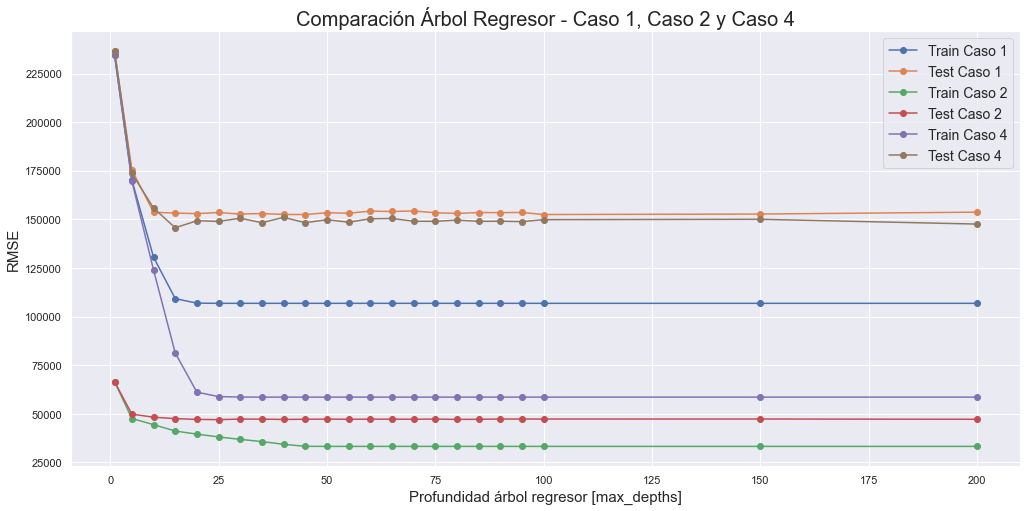

In [178]:
plt.figure(figsize=(17,8))

max_depths = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,150,200]

plt.plot(max_depths, list_tree_1_1a, 'o-', label = 'Train Caso 1')
plt.plot(max_depths, list_tree_2_1a, 'o-', label = 'Test Caso 1')
plt.xlabel('Profundidad árbol regresor [max_depths]', size = 15)
plt.ylabel('RMSE', size =15)

plt.plot(max_depths, list_tree_1_2a, 'o-', label = 'Train Caso 2')
plt.plot(max_depths, list_tree_2_2a, 'o-', label = 'Test Caso 2')
plt.xlabel('Profundidad árbol regresor [max_depths]', size = 15)
plt.ylabel('RMSE', size =15)

plt.plot(max_depths, list_tree_1_4a, 'o-', label = 'Train Caso 4')
plt.plot(max_depths, list_tree_2_4a, 'o-', label = 'Test Caso 4')
plt.xlabel('Profundidad árbol regresor [max_depths]', size = 15)
plt.ylabel('RMSE', size =15)

plt.legend(loc = 'best', fontsize = 14)
plt.title('Comparación Árbol Regresor - Caso 1, Caso 2 y Caso 4', size = 20)

plt.show()


Estudiando el error RMSE (en dónde buscamos un error menos), podemos observar que los modelos para el caso 2: Utilizan del dataset filtrado en los puntos 1 y 2 es el adecuado para la realización de los modelos de ML. Esto puede deberse a la limpieza exhaustiva que realicé que pudieron lograr la disminución del regresor para los tipos de propiedad Casas y PH que son los pocos representativos dentro del dataset. 

Siguiendo, se encuentran los modelos del caso 1 y caso 4 (para el caso del conjunto de interés test) presenta una similitud. Es de recordar que el Caso 1 utiliza todos los features en cambio, para el caso 4, se seleccionaron las 3 features a partir del ranking obtenido mediante el análisis RFE/VRF.

Aunque existe una diferencia medianamente visible frente a ambos casos, se escoge el modelo 1 del árbol regresor cómo el más eficaz y eficiente y el caso 2 cómo el dataset más adecuado para el entramiento del modelo. Claro está, en dado caso de contar con un mayor número de features (recordando de que no se utilizaron todas las features del dataset inicialmente cargado), la utilización del modelo RFE/VRF sería de utilidad para seleccionar las variables más relevantes para la construcción del modelo.

## Elección del módelo

Considerando las limites de la métria de R Cuadrado sin ajuste (que no nos indica si el modelo explica la varianza debido a que está sobreajustado (overfitted)) dejamos esta métrica simplemente para observar el ajuste lineal del modelo. Por ende, debido a la pertinenecia descrita en la selección de la métrica RMSE seleccionamos el modelo con el valor más bajo RMSE (este valor nos indica el precio USD por el cual nos estamos alejando del valor real) que, en nuestro caso, nos arroja el modelo descrito para el Caso 2, seguido del módelo del caso 4 y Caso 1. Aunque las diferencias no son significativas entre ambos casos, fueron los que obtuvieron un menor rendimiento. Estas diferencias puede deberse, entonces, qué el dataset debidamente filtrado tiene un impacto considerable en el entrenamiento y evaluación del modelo. 

Se elige el modelo del caso 2 cómo el más adecuado para la determinación por regresión de los precios de las propiedades.

Se tiene, entonces un error (en USD) para el conjunto Train de 38,075.798 USD y para el conjunto Test de 46,910.338 USD. Aunque un desajuste del precio de la propiedade de más de 46,000 USD sigue siendo considerable, es posible encontrarse con propuestas de mejora como lo son: evaluar los datos disponibles para los diferentes tipos de propiedad, postular modelos ajustados a otros parámetros (cómo lo puede ser, las zonas de la ciudad), realizar una nueva limpieza del dataset más profunda y rigurosa, entre otros.